# Unit test notebook for Fission Fragment 1

In [1]:
from cheftgp.eft import *
from cheftgp.gaussianprocess_refactored import *
from cheftgp.graphs import *
from cheftgp.scattering import *
from cheftgp.utils import *

import scipy
from scipy.stats import multivariate_normal
from scipy.optimize import curve_fit
from scipy.interpolate import interpn

## We make sure that `p_approx` generalizes from one to two dimensions for all prescriptions of $p$

In [2]:
# sparse meshes
deg_mesh = np.array([45, 90, 135])
tlab_mesh = np.array([3, 12, 48, 192])

p_grid_prel = p_approx(p_name = "Qofprel", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_prel)

p_grid_qcm = p_approx(p_name = "Qofqcm", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_qcm)

p_grid_pq = p_approx(p_name = "Qofpq", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_pq)

[[ 37.51542954  75.03085916 150.06171898 300.12344279]
 [ 37.51542954  75.03085916 150.06171898 300.12344279]
 [ 37.51542954  75.03085916 150.06171898 300.12344279]]
[[ 28.71306668  57.42613343 114.85226737 229.70453844]
 [ 53.05482925 106.10965862 212.21931818 424.43864318]
 [ 69.31947501 138.63895017 277.27790156 554.55581205]]
[[ 47.52444418  82.02942825 153.27705819 300.71938793]
 [ 60.68300946 109.99172106 213.11156777 424.48001297]
 [ 73.07604023 139.47034611 277.31371633 554.55587598]]


## We make sure that `Q_approx` generalizes from one to two dimensions for all prescriptions of $Q$ and $p$

In [3]:
Q_sum = Q_approx(p = p_grid_prel, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_prel, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_prel, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

Q_sum = Q_approx(p = p_grid_qcm, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_qcm, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_qcm, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

Q_sum = Q_approx(p = p_grid_pq, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_pq, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_pq, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

[[0.19765251 0.23989962 0.32439383 0.49338226]
 [0.19765251 0.23989962 0.32439383 0.49338226]
 [0.19765251 0.23989962 0.32439383 0.49338226]]
[[0.22998163 0.2285464  0.24291757 0.4990366 ]
 [0.22998163 0.2285464  0.24291757 0.4990366 ]
 [0.22998163 0.2285464  0.24291757 0.4990366 ]]
[[0.23       0.23       0.25010286 0.50020574]
 [0.23       0.23       0.25010286 0.50020574]
 [0.23       0.23       0.25010286 0.50020574]]
[[0.18773994 0.22007447 0.28474354 0.41408169]
 [0.21515183 0.27489826 0.39439112 0.63337685]
 [0.23346788 0.31153035 0.46765529 0.77990519]]
[[0.22999693 0.22971045 0.22164143 0.37864226]
 [0.22982446 0.22271228 0.34790216 0.70721444]
 [0.22908373 0.23054107 0.46038721 0.92421866]]
[[0.23       0.23       0.23       0.3828409 ]
 [0.23       0.23       0.35369886 0.70739774]
 [0.23       0.23106492 0.46212984 0.92425969]]
[[0.20892392 0.24778089 0.32801471 0.49405336]
 [0.22374213 0.27926996 0.39539591 0.63342344]
 [0.23769824 0.31246661 0.46769563 0.77990527]]
[[0.22

## Plot for all $Q$ prescriptions against $p_{\rm rel}$

In [4]:
# Elab_array = np.linspace(0, 350, 351)

# fig, ax = plt.subplots(figsize = (5.1, 3.8))

# Lambdab = 600

# ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "max", Lambda_b=Lambdab, m_pi = 138), 
#         c = 'red', label = "max")
# ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "smax", Lambda_b=Lambdab, m_pi = 138), 
#         c = 'green', label = "smoothmax")
# ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "rawsum", Lambda_b=Lambdab, m_pi = 138), 
#         c = 'blue', label = r'sum ($m_{\mathrm{eff}} = m_{\pi}$, unscaled)', ls='--')
# ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "sum", Lambda_b=Lambdab, m_pi = 138), 
#         c = 'blue', label = r'sum ($m_{\mathrm{eff}} = m_{\pi}$, scaled)')

# axis_font = {'size':'18'}
# ax.set_xlabel(r'$p_{\mathrm{rel}}$ [MeV]', **axis_font)
# ax.set_ylabel(r'$Q$', **axis_font)
# ax.set_ylim(0, 1)
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(loc = 'upper left', prop={'size': 10}, ncol = 1, columnspacing = 0.2)
# fig.tight_layout()
# fig.savefig('figures/Qparamvsprel.png')

## Evaluates the ratio $Q_{\rm sum} / Q_{\rm smax}$ over the relevant range in momentum and compares to a linear fit function

In [5]:
# def Qcomparison(prel, Lambda_b, mpi):
#     return scipy.integrate.trapz(
#             Q_approx(prel, "rawsum", 
#                 Lambda_b, 
#                 m_pi = mpi, 
#                 single_expansion = False), prel) / \
#         scipy.integrate.trapz(
#             Q_approx(prel, "smax", 
#                 Lambda_b, 
#                 m_pi = mpi, 
#                 single_expansion = False), prel)
            

# Elab_array = np.linspace(1, 350, 350)
# prel_array = E_to_p(Elab_array, 'np')
# mpi_array = np.linspace(50, 325, 276)

# fig, ax = plt.subplots(figsize = (5.1, 3.8))

# Lambdab = 600

# ax.plot(mpi_array, [Qcomparison(prel_array, Lambdab, m) for m in mpi_array], 
#         c = 'blue', label = r'$Q_{\mathrm{sum}}/Q_{\mathrm{smax}}$')
# ax.plot(mpi_array, Qsum_to_Qsmoothmax(mpi_array), 
#         c = 'orange', label = 'fitted')

# axis_font = {'size':'18'}
# ax.set_xlabel(r'$m_{\mathrm{eff}}$ [MeV]', **axis_font)
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(loc = 'upper left', prop={'size': 10}, ncol = 1, columnspacing = 0.2)
# fig.tight_layout()
# fig.savefig('figures/QsumQsmax.png')

## Plots of length scale and variance by order for different potentials

#### For each choice of scale and scheme, sets the total possible orders and nomenclature

In [6]:
EKM0p8fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EKM_R-0p8fm.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "SCS",
    "0p8fm",
)
EKM0p9fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EKM_R-0p9fm.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "SCS",
    "0p9fm",
)
EKM1p0fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EKM_R-1p0fm.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "SCS",
    "1p0fm",
)
EKM1p1fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EKM_R-1p1fm.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "SCS",
    "1p1fm",
)
EKM1p2fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EKM_R-1p2fm.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "SCS",
    "1p2fm",
)

RKE400MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_RKE_L-400MeV.h5",
    np.array([0, 2, 3, 4, 5, 6]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds", "Purples"]],
    "SMS",
    "400MeV",
)
RKE450MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_RKE_L-450MeV.h5",
    np.array([0, 2, 3, 4, 5, 6]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds", "Purples"]],
    "SMS",
    "450MeV",
)
RKE500MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_RKE_L-500MeV.h5",
    np.array([0, 2, 3, 4, 5, 6]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds", "Purples"]],
    "SMS",
    "500MeV",
)
RKE550MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_RKE_L-550MeV.h5",
    np.array([0, 2, 3, 4, 5, 6]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds", "Purples"]],
    "SMS",
    "550MeV",
)

EMN450MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EM-450MeV.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "EMN",
    "450MeV",
)
EMN500MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EM-500MeV.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "EMN",
    "500MeV",
)
EMN550MeV = ScaleSchemeBunch(
    "../observables_data/scattering_observables_EM-550MeV.h5",
    np.array([0, 2, 3, 4, 5]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]],
    "EMN",
    "550MeV",
)

GT0p9fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_Gezerlis-0p9fm.h5",
    np.array([0, 2, 3]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens"]],
    "GT",
    "0p9fm",
)
GT1p0fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_Gezerlis-1p0fm.h5",
    np.array([0, 2, 3]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens"]],
    "GT",
    "1p0fm",
)
GT1p1fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_Gezerlis-1p1fm.h5",
    np.array([0, 2, 3]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens"]],
    "GT",
    "1p1fm",
)
GT1p2fm = ScaleSchemeBunch(
    "../observables_data/scattering_observables_Gezerlis-1p2fm.h5",
    np.array([0, 2, 3]),
    [plt.get_cmap(name) for name in ["Oranges", "Greens"]],
    "GT",
    "1p2fm",
)

#### Sets meshes and extracts coefficients from the data for a particular observable and potential

In [7]:
# sets the potential of interest
ScaleScheme = RKE500MeV

# choose energy and angle meshes
t_lab = ScaleScheme.get_data("t_lab")
# t_lab_input = E_to_p(E_lab = t_lab, interaction = "np")
# X_train_tlab = E_to_p(E_lab = np.array([5, 21, 48, 85, 133, 192, 261]), 
#                      interaction = "np")[:, None]
# t_lab_label = "Relative momentum (MeV)"
t_lab_input = t_lab
X_train_tlab = np.array([5, 21, 48, 85, 133, 192, 261])[:, None]
t_lab_label = "Lab energy (MeV)"
X_tlab = t_lab_input[:, None]
t_lab_subset = t_lab_input[0::10]
degrees = ScaleScheme.get_data("degrees")
degrees_subset = np.linspace(start = np.min(degrees), 
                           stop = np.max(degrees), 
                           num = 35, 
                           dtype = int)
degrees_input = degrees
X_train_deg = np.array([1, 30, 60, 90, 120, 150, 179])[:, None]
degrees_label = "Scattering angle (degrees)"
X_deg = degrees_input[:, None]

# extracts data
obs_data_name = "DSG"
obs_data = ScaleScheme.get_data(obs_data_name)

Lambda_b_coeffs = 600
mpi_eff_coeffs = 200

# sets reference scale
if obs_data_name == "DSG":
    yref = obs_data[-1, :, :]
else:
    yref = np.ones(np.shape(obs_data)[1:])

# calculates ratio
p_type = "Qofprel"
p_grid = p_approx(p_name = p_type, 
                 prel = E_to_p(E_lab = t_lab, interaction = "np"), 
                 degrees = degrees).T
Q_type = "sum"
ratio = Q_approx(p = p_grid, 
                 Q_parametrization = Q_type, 
                 Lambda_b = Lambda_b_coeffs, 
                 m_pi = mpi_eff_coeffs,
                 single_expansion=False)

# extracts coefficients
coeffs_flattened = gm.coefficients(
            np.reshape(obs_data, (np.shape(obs_data)[0], np.shape(obs_data)[1] * np.shape(obs_data)[2])).T, 
            ratio=np.reshape(ratio, np.shape(ratio)[0] * np.shape(ratio)[1]),
            ref=np.reshape(yref, np.shape(yref)[0] * np.shape(yref)[1]), 
            orders=ScaleScheme.orders_full)
coeffs_surfaces = np.reshape(coeffs_flattened.T, np.shape(obs_data))

#### Plots of scattering-angle length scale and variance by order

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\1772394173.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_tlab_ls.flat)[o].scatter(t,
C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\1772394173.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping

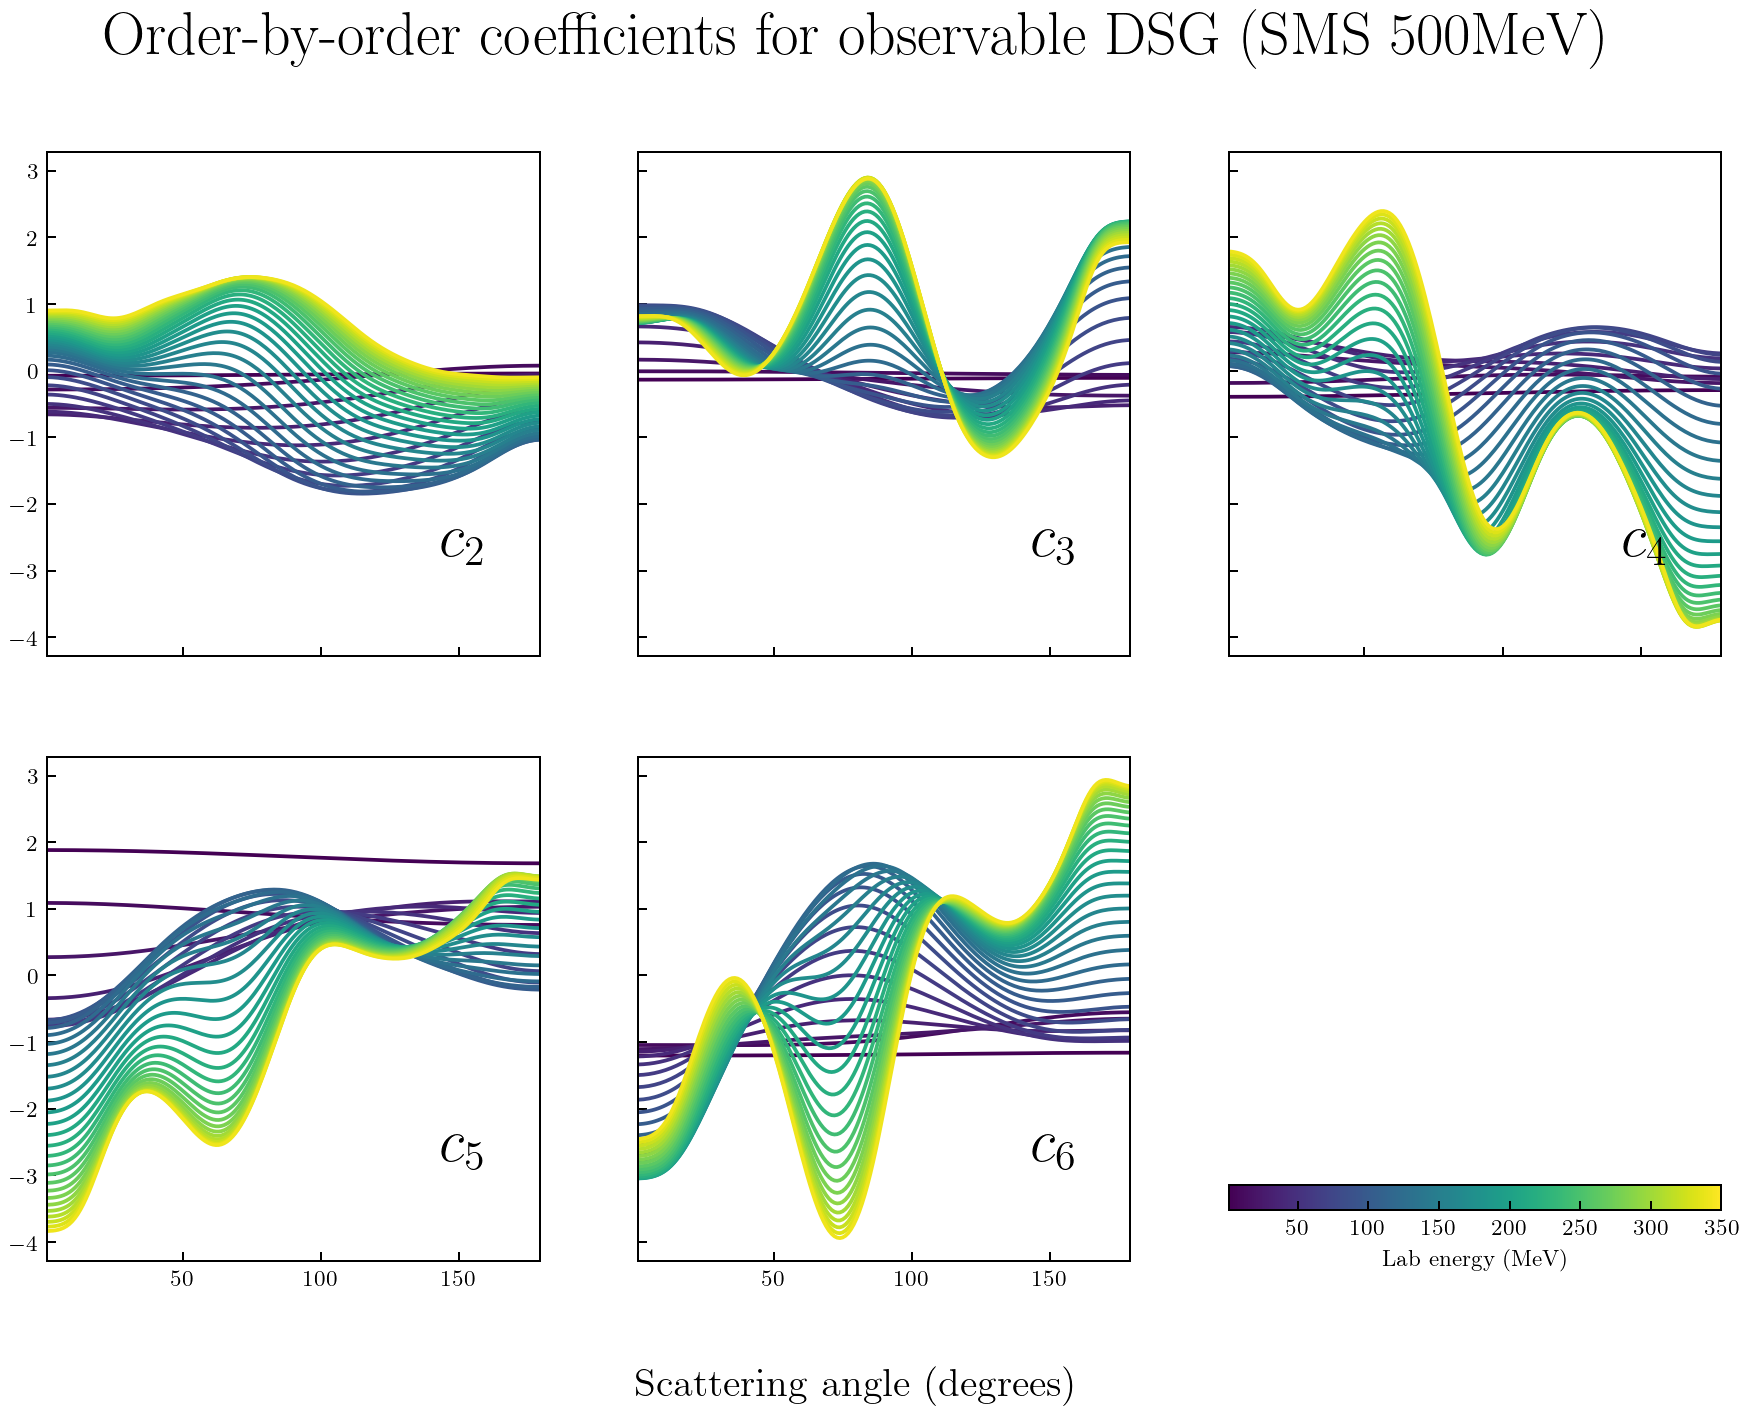

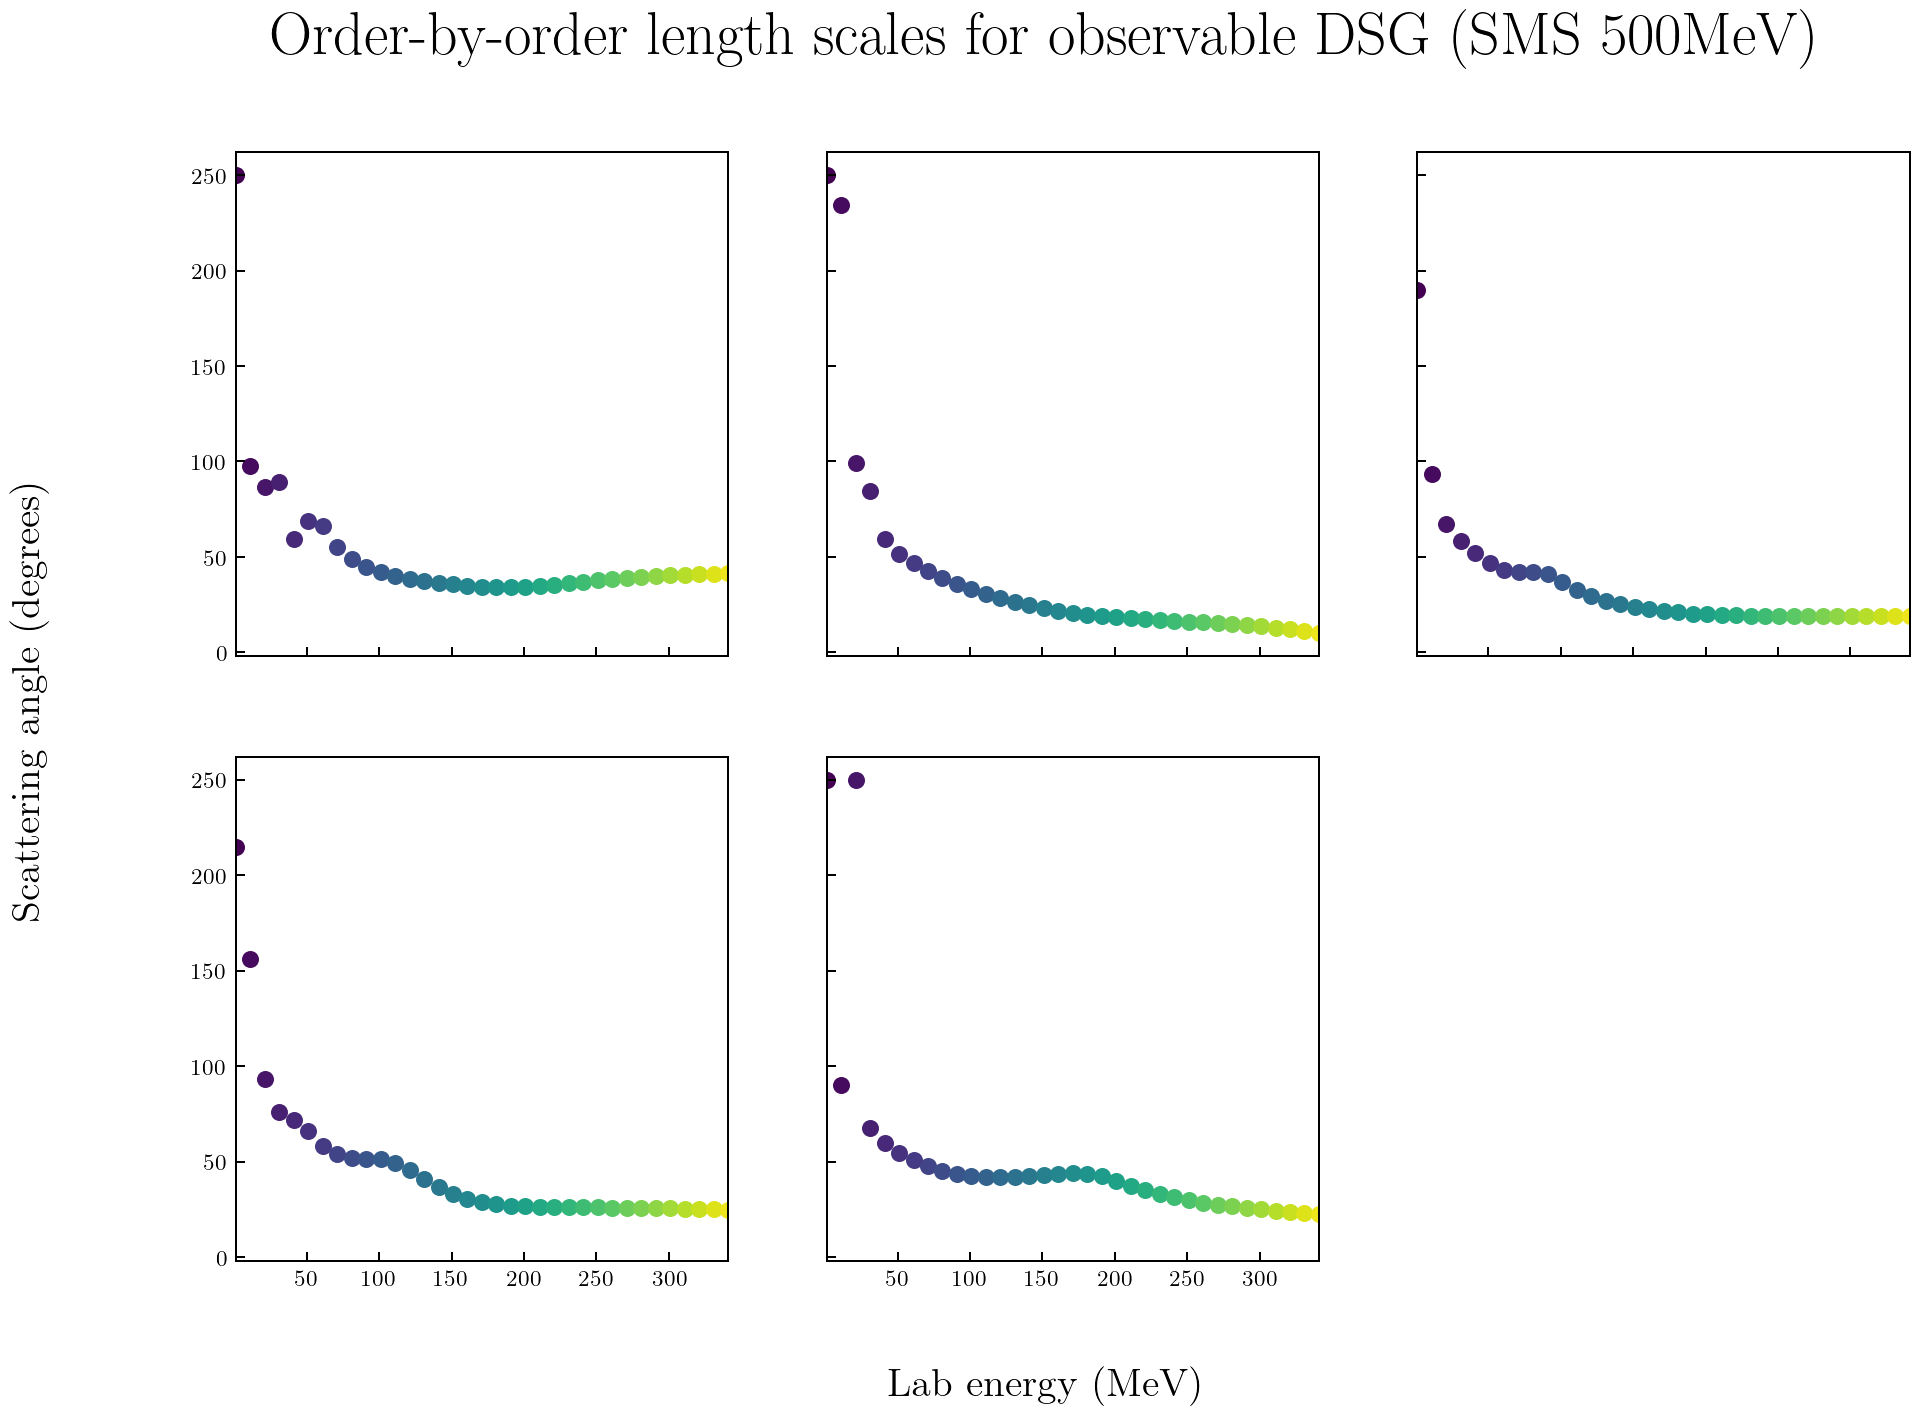

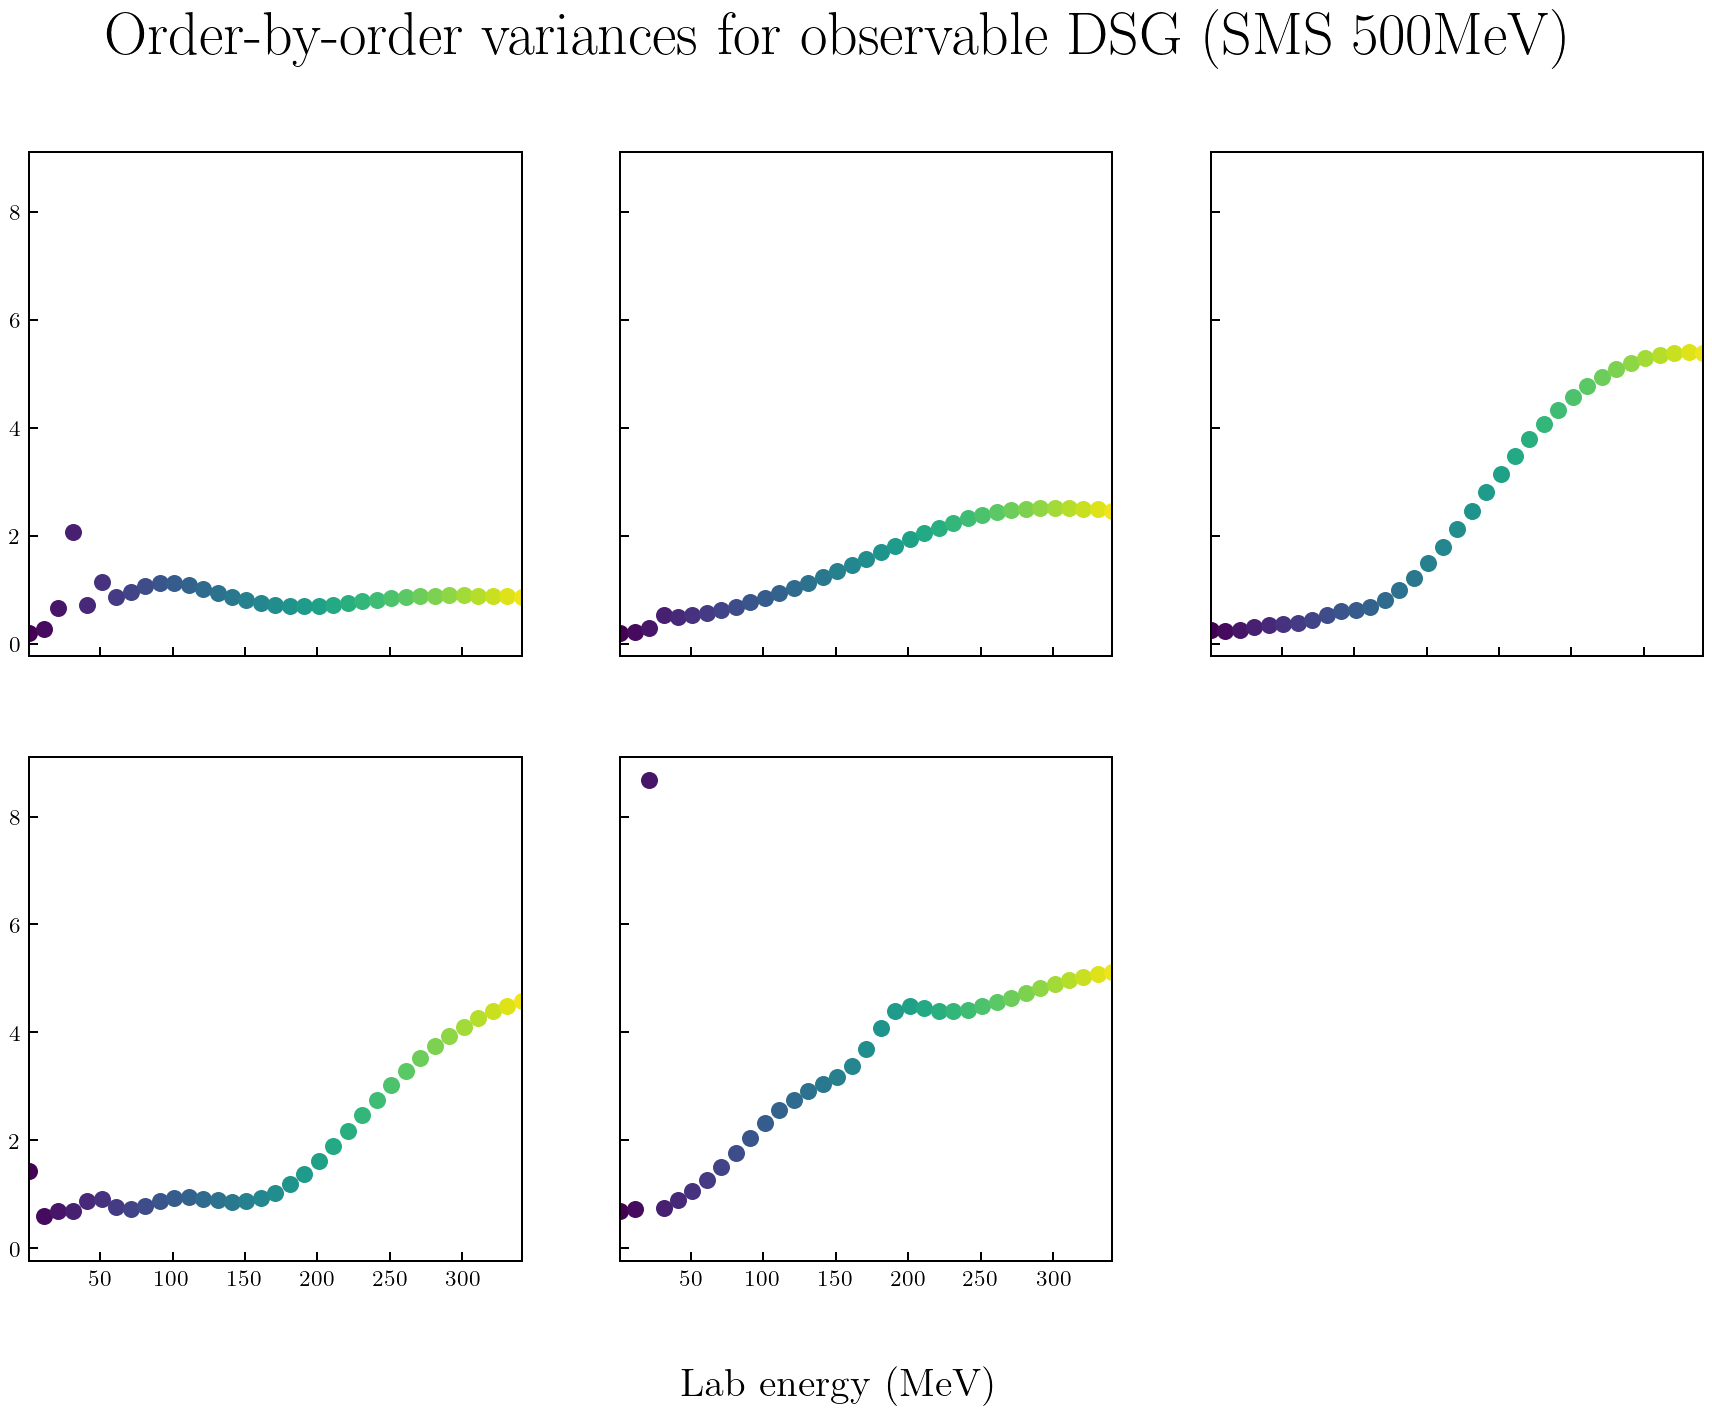

In [8]:
# choose colormap and fix to different energies
cmap_tlab = mpl.cm.viridis
norm_tlab = mpl.colors.Normalize(vmin=np.min(t_lab), vmax=np.max(t_lab))

# create figure with n_orders subplots
fig_tlab_coeffs, axs_tlab_coeffs = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(12, 8))
fig_tlab_coeffs.supxlabel(degrees_label, size = 16)
fig_tlab_coeffs.suptitle('Order-by-order coefficients for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)

# create figure with n_orders subplots
fig_tlab_ls, axs_tlab_ls = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(12, 8))
fig_tlab_ls.supxlabel(t_lab_label, size = 16)
fig_tlab_ls.supylabel(degrees_label, size = 16)
fig_tlab_ls.suptitle('Order-by-order length scales for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)

# create figure with n_orders subplots
fig_tlab_var, axs_tlab_var = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(12, 8))
fig_tlab_var.supxlabel(t_lab_label, size = 16)
fig_tlab_var.suptitle('Order-by-order variances for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)

# plot at each energy in mesh
for o in range(np.shape(coeffs_surfaces)[0] - 1):
    (axs_tlab_coeffs.flat)[o].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o + 1]}}}$', 
                       transform=(axs_tlab_coeffs.flat)[o].transAxes, 
                       size = 24)
        
    for t in t_lab_subset:
        (axs_tlab_coeffs.flat)[o].plot(degrees, 
                    coeffs_surfaces[o + 1, np.isin(t_lab_input, t), :].T, 
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
        
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=45,
                      length_scale_bounds=(10, 250)) + \
                      WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        gp.fit(X_train_deg, 
               (coeffs_surfaces[o + 1, np.isin(t_lab_input, t), :].T)[np.isin(degrees, X_train_deg)])
        ls_fit = np.exp(gp.kernel_.theta)
        (axs_tlab_ls.flat)[o].scatter(t, 
                    ls_fit, 
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
        
        pred, std = gp.predict(X_deg, return_std=True)
        underlying_std = gp.cov_factor_
        (axs_tlab_var.flat)[o].scatter(t, 
                    underlying_std, 
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))

fig_tlab_coeffs.delaxes(axs_tlab_coeffs[-1, -1])        
fig_tlab_coeffs.colorbar(mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab), ax = axs_tlab_coeffs[-1, -1],
             orientation='horizontal', label=t_lab_label)

fig_tlab_ls.delaxes(axs_tlab_ls[-1, -1])
fig_tlab_var.delaxes(axs_tlab_var[-1, -1])

# saves figures
fig_tlab_coeffs.savefig('figures/' + 'coeffs' + '_' + 'tlab_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')
fig_tlab_ls.savefig('figures/' + 'ls' + '_' + 'tlab_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')
fig_tlab_var.savefig('figures/' + 'var' + '_' + 'tlab_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')

#### Plots of scattering-angle length scale and variance over all orders

C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\1511687467.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs_tlab_ls_all.scatter(t,
C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\1511687467.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs_tlab_var_all.scatter(t,
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:891: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally 

[230.99779741  -0.3927878 ]


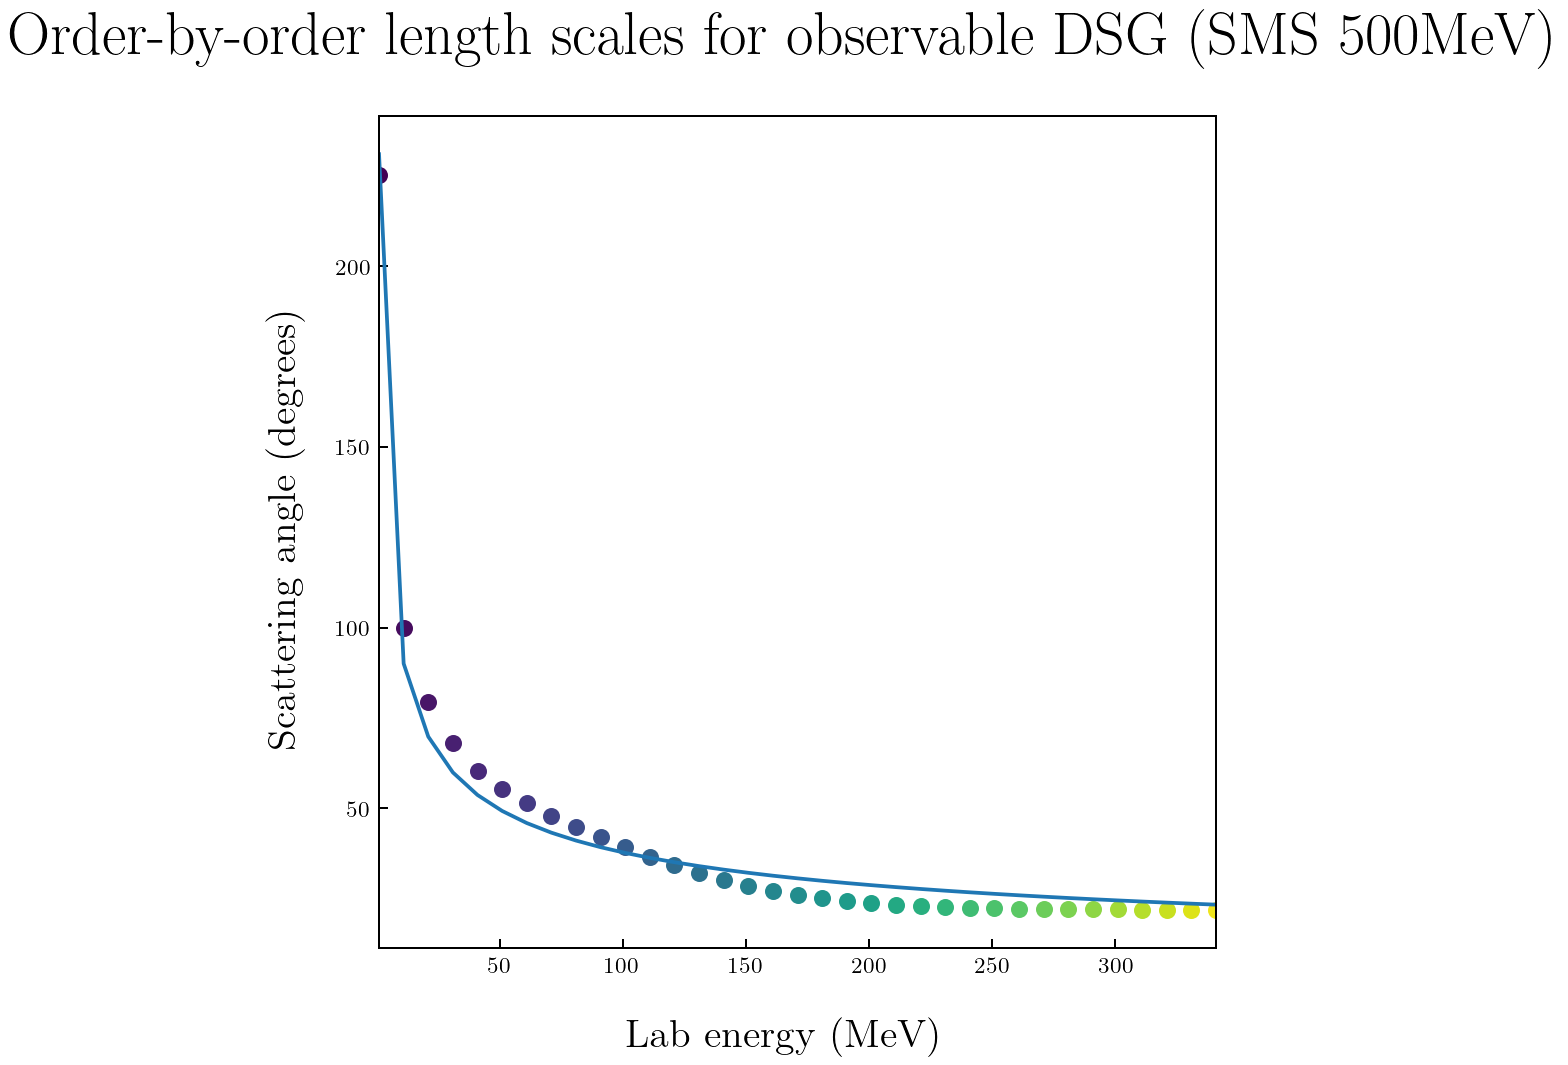

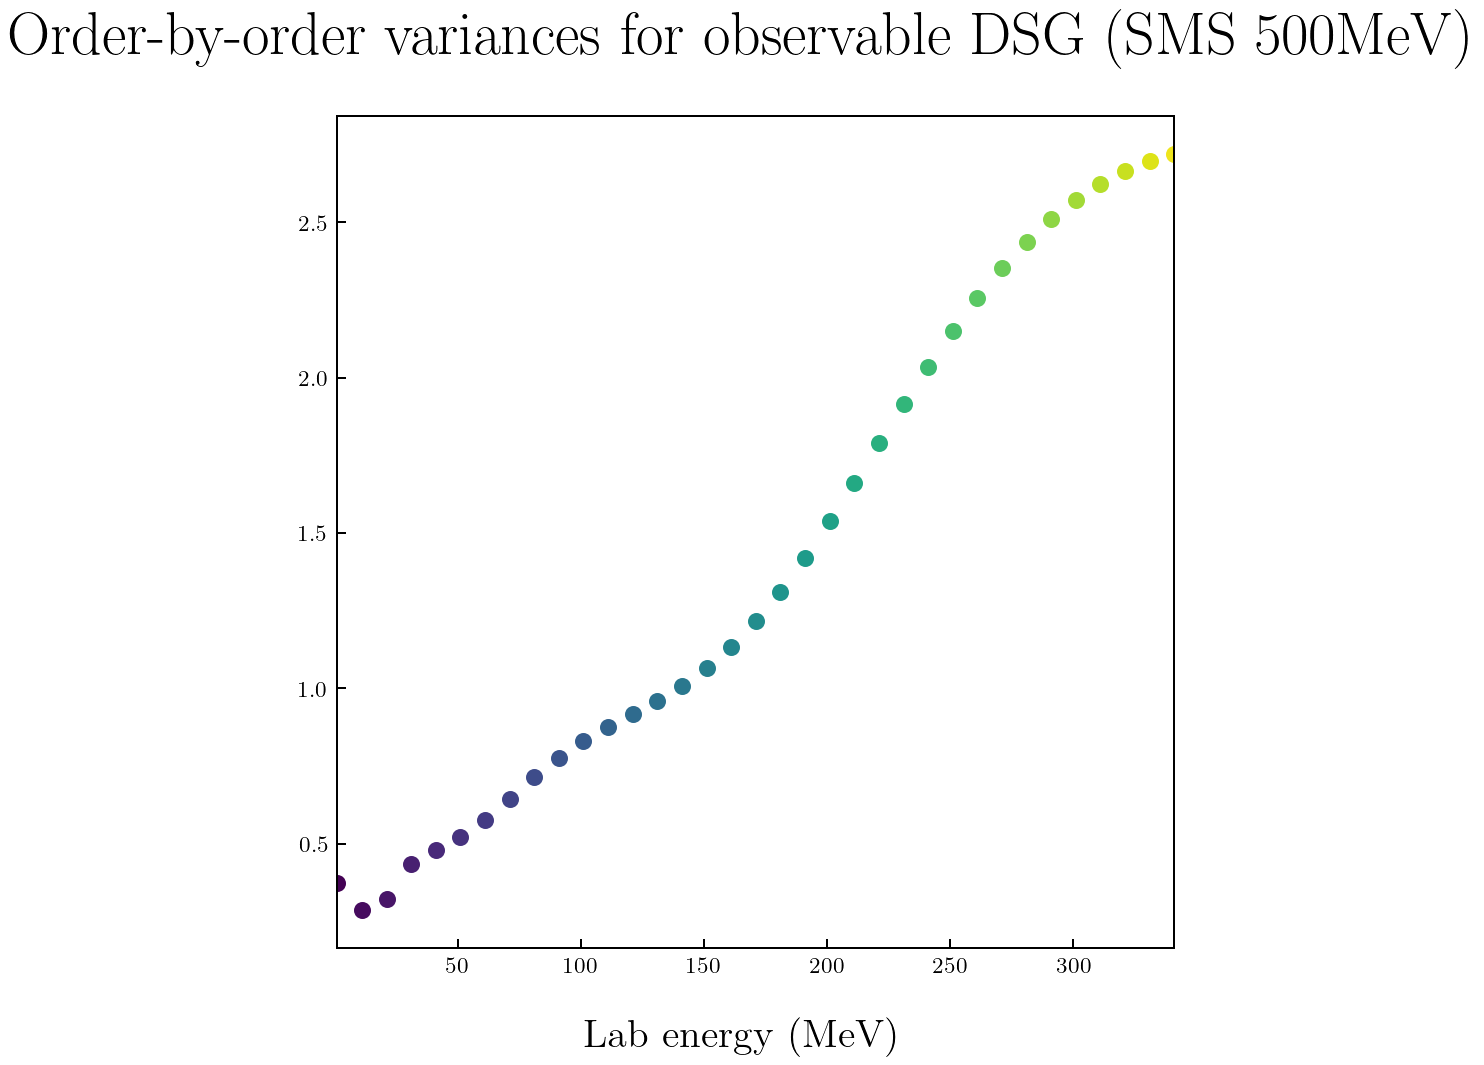

In [9]:
# create figure with n_orders subplots
fig_tlab_ls_all, axs_tlab_ls_all = plt.subplots(1, 1, sharex = True, sharey=True, figsize=(6, 6))
fig_tlab_ls_all.supxlabel(t_lab_label, size = 16)
fig_tlab_ls_all.supylabel(degrees_label, size = 16)
fig_tlab_ls_all.suptitle('Order-by-order length scales for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)
# axs_tlab_ls_all.semilogx()
# axs_tlab_ls_all.semilogy()

axs_tlab_ls_all_array = np.array([])

# create figure with n_orders subplots
fig_tlab_var_all, axs_tlab_var_all = plt.subplots(1, 1, sharex = True, sharey=True, figsize=(6, 6))
fig_tlab_var_all.supxlabel(t_lab_label, size = 16)
fig_tlab_var_all.suptitle('Order-by-order variances for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)
# axs_tlab_var_all.semilogx()
# axs_tlab_var_all.semilogy()

# plots at each energy in mesh
for t in t_lab_subset:
    gp = gm.ConjugateGaussianProcess(
        RBF(length_scale=45,
                  length_scale_bounds=(10, 250)) + \
                  WhiteKernel(1e-5, noise_level_bounds='fixed'), 
        center=0, 
        disp=0, 
        df=1,
        scale=1, 
        n_restarts_optimizer=100, 
        random_state=None,
        sd=None)
    gp.fit(X_train_deg, 
           np.reshape(coeffs_surfaces[:, np.isin(t_lab_input, t), :].T, 
                      (len(degrees), 
                       np.shape(coeffs_surfaces)[0]))[np.isin(degrees, X_train_deg), :])
    ls_fit = np.exp(gp.kernel_.theta)
    axs_tlab_ls_all.scatter(t, 
                ls_fit, 
                c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
    axs_tlab_ls_all_array = np.append(axs_tlab_ls_all_array, ls_fit)
    pred, std = gp.predict(X_deg, return_std=True)
    underlying_std = gp.cov_factor_
    axs_tlab_var_all.scatter(t, 
                underlying_std, 
                c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))

# sets fitting function and plots the results
def power(x, a, b):
    return a * x**b
def exponent(x, a, b):
    return a * np.exp(b * x)

popt_power, pcov_power = curve_fit(power, t_lab_subset, axs_tlab_ls_all_array)
print(popt_power)
axs_tlab_ls_all.plot(t_lab_subset, power(t_lab_subset, *popt_power))

# popt_exponent, pcov_exponent = curve_fit(exponent, 
#                                          t_lab_subset, 
#                                          axs_tlab_ls_all_array, 
#                                          p0=(241, -0.00846))
# print(popt_exponent)
# axs_tlab_ls_all.plot(t_lab_subset, exponent(t_lab_subset, *popt_exponent))

# saves figures
fig_tlab_ls_all.savefig('figures/' + 'ls' + '_' + 'tlab_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')
fig_tlab_var_all.savefig('figures/' + 'var' + '_' + 'tlab_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')

#### Plots of lab-energy length scale and variance by order

C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\1869683856.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_deg_ls.flat)[o - 1].scatter(d,
C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\1869683856.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_deg_var.flat)[o - 1].scatter(d,
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:891: ConvergenceWarning: fmin_l_bfgs_b term

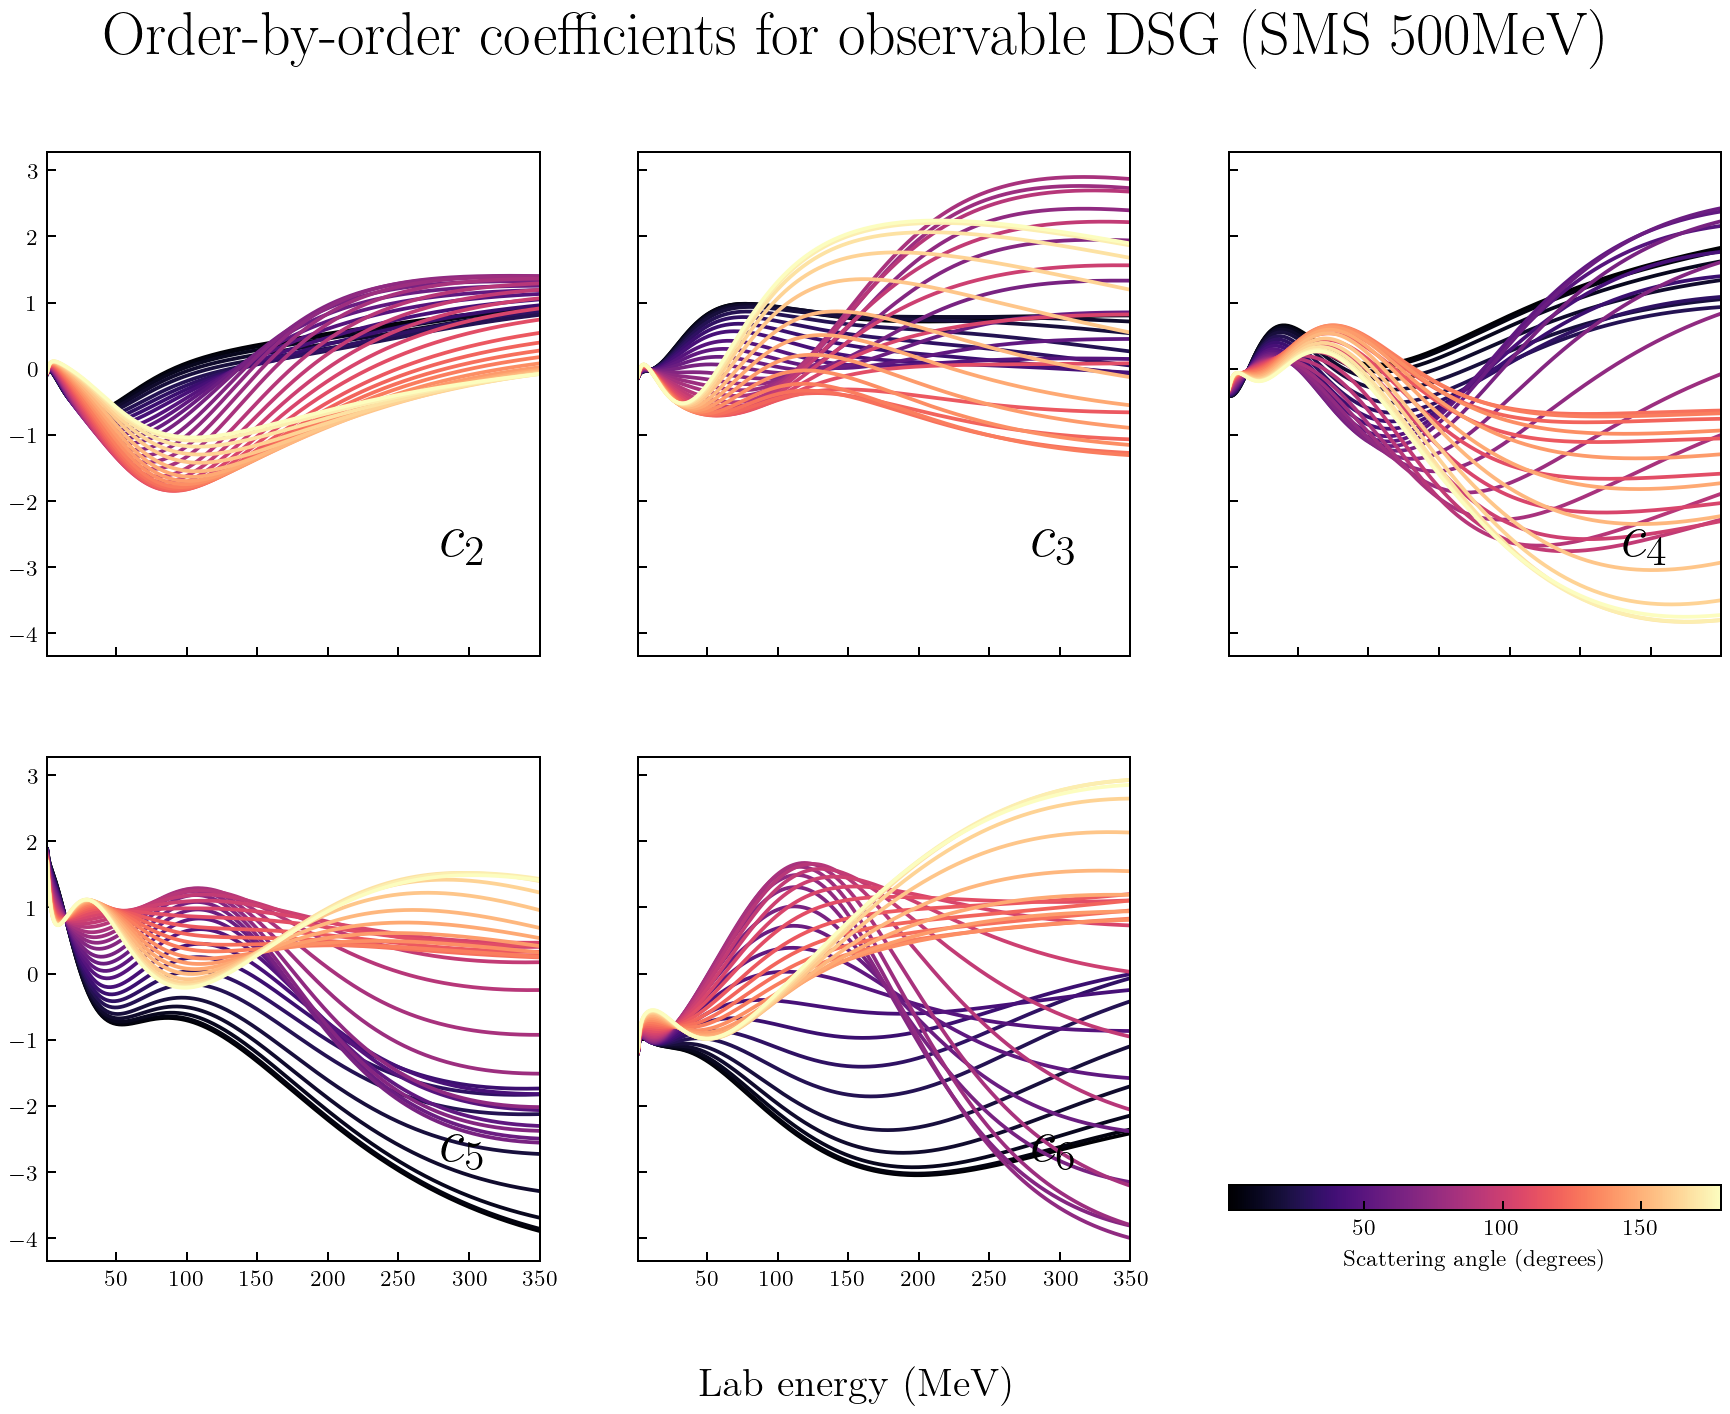

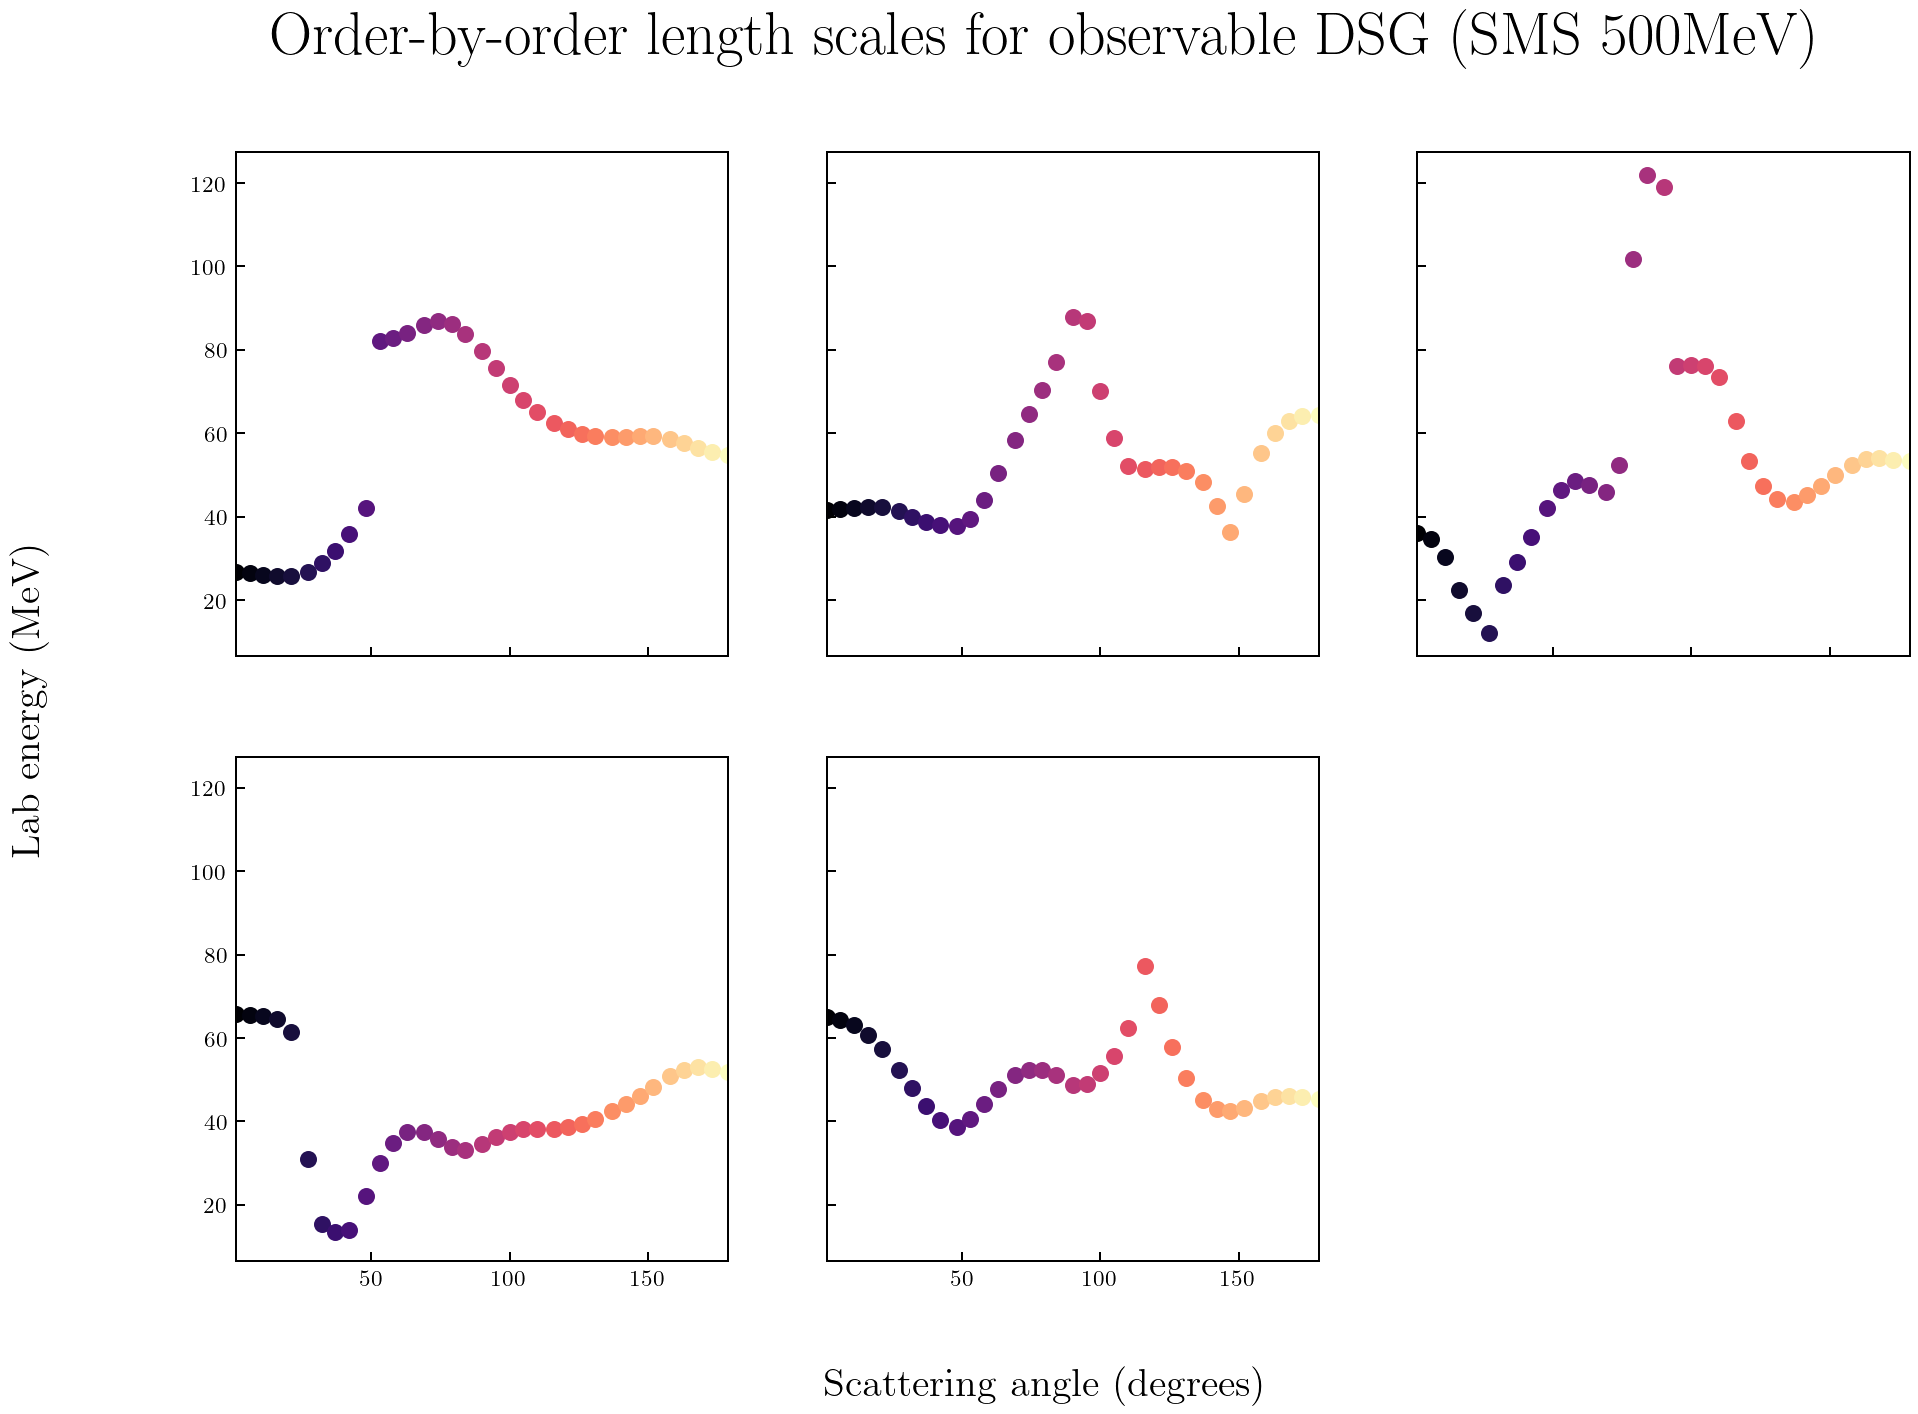

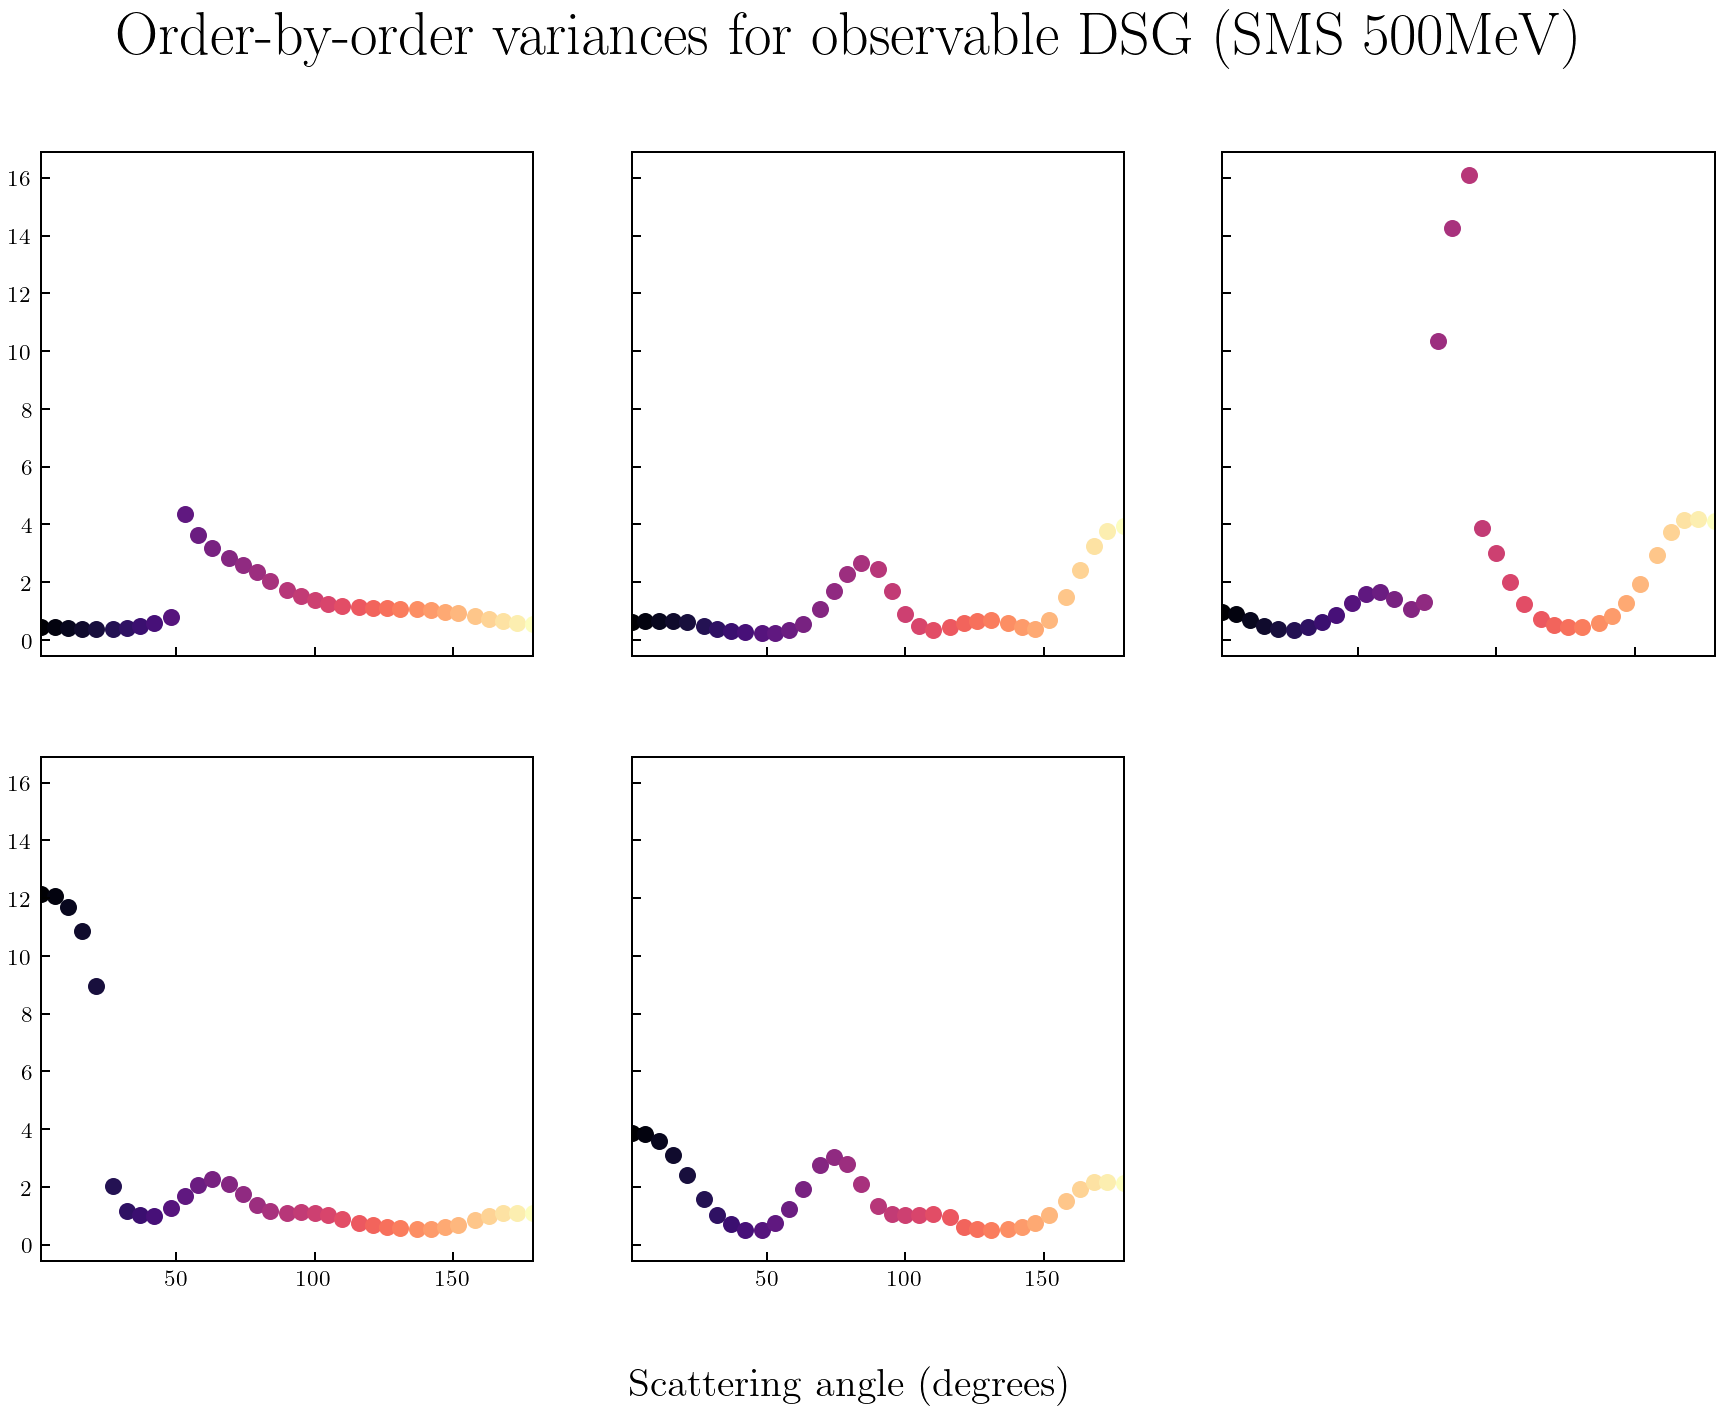

In [10]:
# choose colormap and fix to different energies
cmap_deg = mpl.cm.magma
norm_deg = mpl.colors.Normalize(vmin=np.min(degrees), vmax=np.max(degrees))

# create figure with n_orders subplots
fig_deg_coeffs, axs_deg_coeffs = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(12, 8))
fig_deg_coeffs.supxlabel(t_lab_label, size = 16)
fig_deg_coeffs.suptitle('Order-by-order coefficients for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)

# create figure with n_orders subplots
fig_deg_ls, axs_deg_ls = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(12, 8))
fig_deg_ls.supxlabel(degrees_label, size = 16)
fig_deg_ls.supylabel(t_lab_label, size = 16)
fig_deg_ls.suptitle('Order-by-order length scales for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)

# create figure with n_orders subplots
fig_deg_var, axs_deg_var = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(12, 8))
fig_deg_var.supxlabel(degrees_label, size = 16)
fig_deg_var.suptitle('Order-by-order variances for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)

# plots at each angle in mesh
for o in range(1, np.shape(coeffs_surfaces)[0]):
    (axs_deg_coeffs.flat)[o - 1].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o]}}}$', 
                       transform=(axs_deg_coeffs.flat)[o - 1].transAxes, 
                       size = 24)
        
    for d in degrees_subset:
        (axs_deg_coeffs.flat)[o - 1].plot(t_lab_input, 
                    coeffs_surfaces[o, :, np.isin(degrees, d)].T, 
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))
        
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=60,
                      length_scale_bounds=(12, 300)) + \
                      WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        gp.fit(X_train_tlab, 
               (coeffs_surfaces[o, :, np.isin(degrees, d)].T)[np.isin(t_lab_input, X_train_tlab)])
        ls_fit = np.exp(gp.kernel_.theta)
        (axs_deg_ls.flat)[o - 1].scatter(d, 
                    ls_fit, 
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))
        
        pred, std = gp.predict(X_tlab, return_std=True)
        underlying_std = gp.cov_factor_
        (axs_deg_var.flat)[o - 1].scatter(d, 
                    underlying_std, 
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))

fig_deg_coeffs.delaxes(axs_deg_coeffs[-1, -1])        
fig_deg_coeffs.colorbar(mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg), ax = axs_deg_coeffs[-1, -1],
             orientation='horizontal', label=degrees_label)

fig_deg_ls.delaxes(axs_deg_ls[-1, -1])
fig_deg_var.delaxes(axs_deg_var[-1, -1])

# saves figures
fig_deg_coeffs.savefig('figures/' + 'coeffs' + '_' + 'deg_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')
fig_deg_ls.savefig('figures/' + 'ls' + '_' + 'deg_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')
fig_deg_var.savefig('figures/' + 'var' + '_' + 'deg_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')

#### Plots of lab-energy length scale and variance over all orders

C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\235949765.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs_deg_ls_all.scatter(d,
C:\Users\pjmil\AppData\Local\Temp\ipykernel_13468\235949765.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs_deg_var_all.scatter(d,
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:891: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with

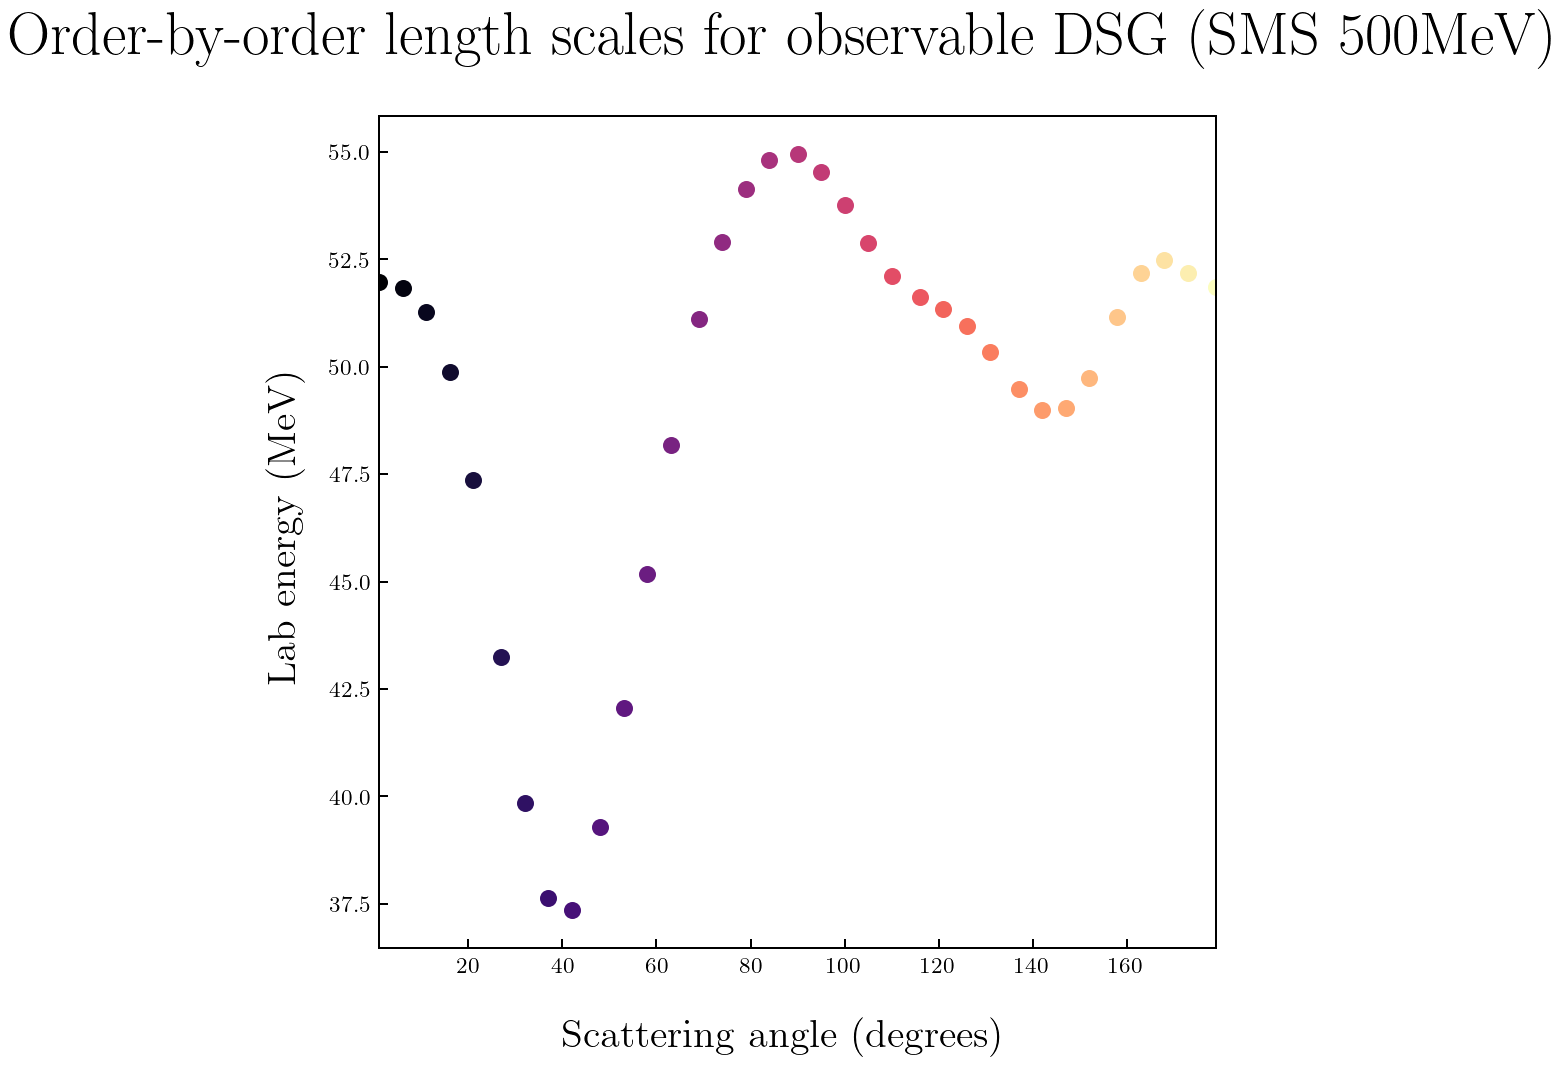

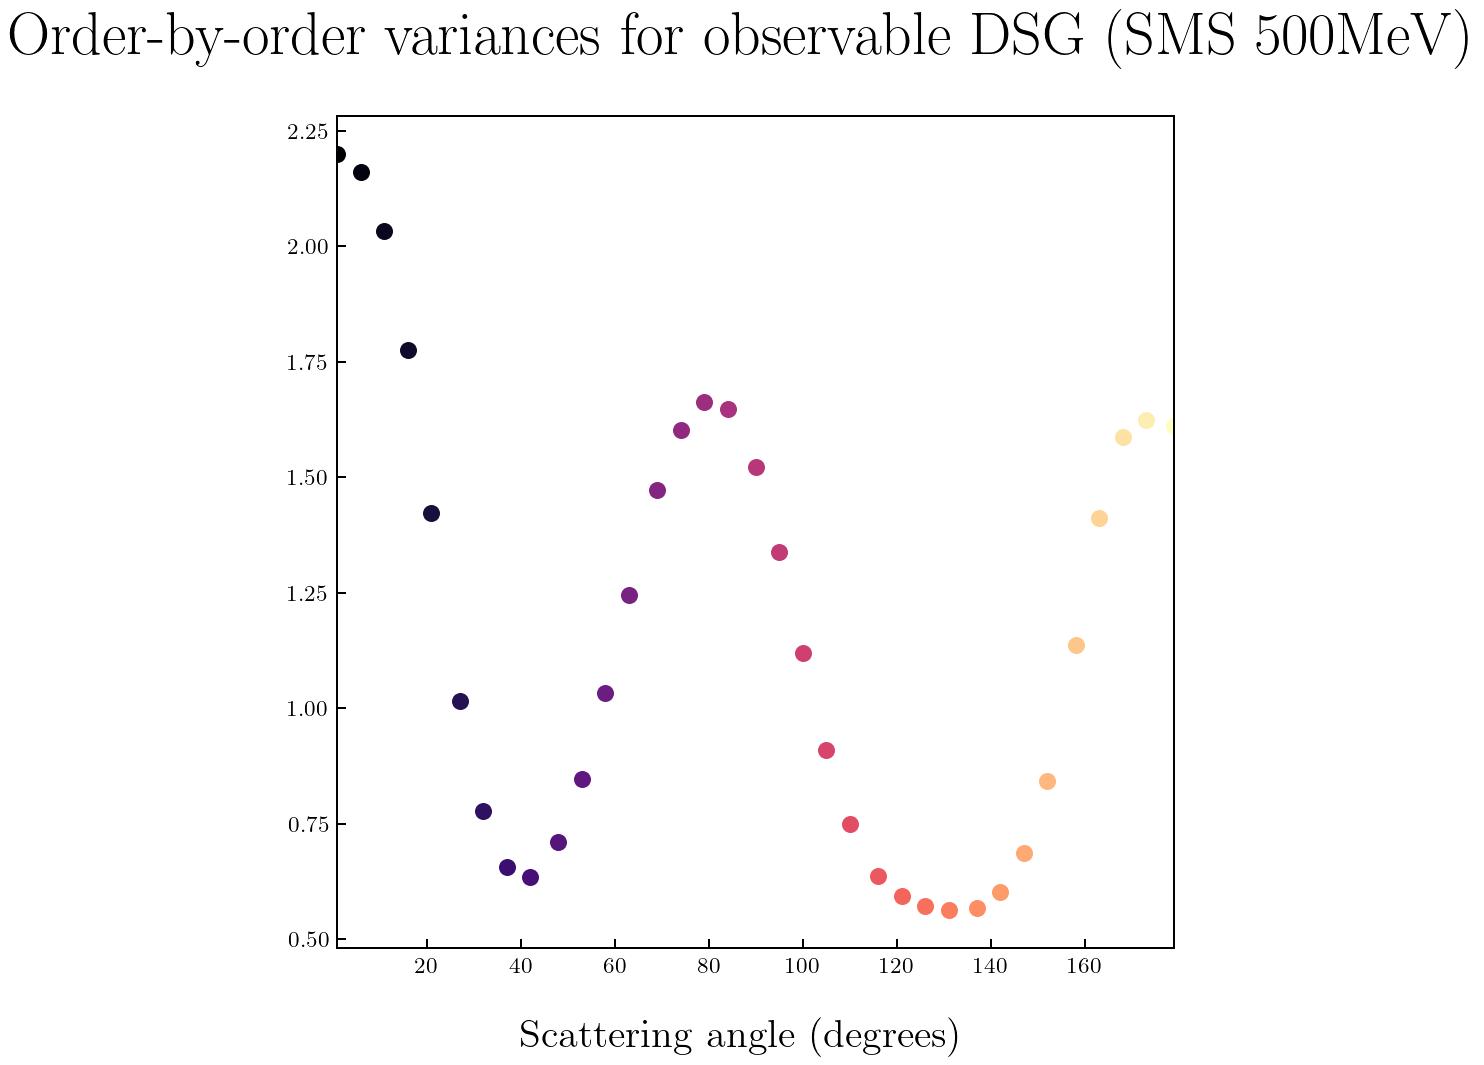

In [11]:
# create figure with n_orders subplots
fig_deg_ls_all, axs_deg_ls_all = plt.subplots(1, 1, sharex = True, sharey=True, figsize=(6, 6))
fig_deg_ls_all.supxlabel(degrees_label, size = 16)
fig_deg_ls_all.supylabel(t_lab_label, size = 16)
fig_deg_ls_all.suptitle('Order-by-order length scales for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)
# axs_deg_ls_all.semilogx()
# axs_deg_ls_all.semilogy()

# create figure with n_orders subplots
fig_deg_var_all, axs_deg_var_all = plt.subplots(1, 1, sharex = True, sharey=True, figsize=(6, 6))
fig_deg_var_all.supxlabel(degrees_label, size = 16)
fig_deg_var_all.suptitle('Order-by-order variances for observable ' + obs_data_name + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 24)
# axs_deg_var_all.semilogx()
# axs_deg_var_all.semilogy()

# plots at each angle in mesh
for d in degrees_subset:
    gp = gm.ConjugateGaussianProcess(
        RBF(length_scale=60,
                  length_scale_bounds=(12, 300)) + \
                  WhiteKernel(1e-5, noise_level_bounds='fixed'), 
        center=0, 
        disp=0, 
        df=1,
        scale=1, 
        n_restarts_optimizer=100, 
        random_state=None,
        sd=None)
    gp.fit(X_train_tlab, 
           np.reshape(coeffs_surfaces[:, :, np.isin(degrees, d)].T, 
                     (len(t_lab), 
                     np.shape(coeffs_surfaces)[0]))[np.isin(t_lab_input, X_train_tlab), :])
    ls_fit = np.exp(gp.kernel_.theta)
    axs_deg_ls_all.scatter(d, 
                ls_fit, 
                c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))

    pred, std = gp.predict(X_tlab, return_std=True)
    underlying_std = gp.cov_factor_
    axs_deg_var_all.scatter(d, 
                underlying_std, 
                c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))

# saves figures
fig_deg_ls_all.savefig('figures/' + 'ls' + '_' + 'deg_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')
fig_deg_var_all.savefig('figures/' + 'var' + '_' + 'deg_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + 'prel' + '_' + 
                    'degrees')

In [12]:
1 / 0

ZeroDivisionError: division by zero

# Generating random data, calculating posterior pdfs, and re-extracting physically meaningful input quantities ($\Lambda_{b}$, $m_{\rm eff}$, $Q$, and $\ell$)

#### Define necessary functions

In [ ]:
# custom version of Q_approx for these unit tests
def Q_approx_unit(p, Q_parametrization, Lambda_b, m_pi,
             single_expansion=False):
    """
    Returns the dimensionless expansion parameter Q.

    Parameters
    ----------
    p (float or array) : momentum (in MeV)
    Q_parametrization (str) : can be "smax", "max", or "sum"
    Lambda_b (float) : value for the cutoff (in MeV)
    m_pi (float) : value for the pion mass (in MeV)
        default : 138
    single_expansion (bool) : whether the soft scale should take into account only p
        default : False
    """
    if single_expansion:
        # for expansions with the momentum p as the only soft scale
        m_pi = 0

    if Q_parametrization == "smax":
        # Interpolate to smooth the transition from m_pi to p with a ratio
        # of polynomials
        n = 8
        q = (m_pi ** n + p ** n) / (m_pi ** (n - 1) + p ** (n - 1)) / Lambda_b
        return q

    elif Q_parametrization == "max":
        try:
            q = max(p, m_pi) / Lambda_b
        except:
            q = np.reshape([max(p_val, m_pi) for p_val in np.array(p).flatten()], np.shape(p)) / Lambda_b
        return q

    elif Q_parametrization == "sum":
        # Transition from m_pi to p with a simple sum
        q = (p + m_pi) / Lambda_b
        return q

# custom version of p_approx for these unit tests
def p_unit(prel, degrees):
#     return A + np.log(1 + B**2 / 1700)
#     return A + B**2 / 2000
    try:
        return np.array([np.array(prel + b**2 / 2000) for b in degrees])
    except:
        return prel + degrees**2 / 2000

In [ ]:
def ratio_fn_posterior_unit(X, p_grid_train, p_param, p_shape, Q_param, mpi_var, lambda_var):
    """
    Function for interpolating between the input space and the ratio across that input space.

    Parameters
    ----------
    X (array) : array of points onto which to map.
    p_grid_train (array) : momentum/momenta for calculating the ratio (dimensionless expansion parameter).
    p_param (str) : type of p parametrization.
        Can be "Qofprel", "Qofqcm", or "Qofpq".
    p_shape (tuple) : shape into which to shape the array of p values.
    Q_param (str) : type of Q parametrization.
        Can be "smoothmax", "max", or "sum".
    mpi_var (float) : value of the (effective) pion mass (in MeV) for calculating the ratio.
    lambda_var (float) : value of the breakdown scale (in MeV) for calculating the ratio.
    """
    p = np.array([])
    for pt in p_grid_train:
        try:
            p = np.append(p, p_unit(degrees = np.array([pt[0]]), prel = np.array([pt[1]])))
        except:
            if np.abs(np.amax(p_grid_train)) > 1:
                p = np.append(p, p_unit(degrees=np.array([pt[0]]), prel=np.array([0])))
            else:
                p = np.append(p, p_unit(degrees=np.array([0]), prel=np.array([pt[0]])))
    return Q_approx_unit(p = np.reshape(p, p_shape), Q_parametrization=Q_param, 
                         Lambda_b = lambda_var, m_pi = mpi_var)

def ratio_fn_posterior_const(X, p_shape, p_grid_train, Q):
    """
    Function for interpolating between the input space and the ratio across that input space.

    Parameters
    ----------
    X (array) : array of points onto which to map.
    p_shape (tuple) : shape into which to shape the array of p values.
    p_grid_train (array) : momentum/momenta for calculating the ratio (dimensionless expansion parameter).
    Q (float) : value of the ratio.
    """
    return Q

@ray.remote
def log_likelihood(gp_fitted,
                   mesh_points,
                   log_likelihood_fn_kwargs
                   ):
    """
    Function for interpolating calculating the log-likelihood for a fitted TrunctionTP object.
    Specifically, this is for cases with random variables (Lambda_b, ell_degrees, ell_energy, 
    mpi_eff).
    Parameters
    ----------
    gp_fitted (TruncationTP) : Student t-distribution object from GSUM.
    mesh_points (array) : array over which evaluation takes place.
    log_likelihood_fn_kwargs (dict) : kwargs for evaluation.
    """
    return [gp_fitted.log_marginal_likelihood([pt[1 + n] for n in range(len(pt) - 2)],
                                              **{**log_likelihood_fn_kwargs,
                                                  **{"mpi_var": pt[-1],
                                                 "lambda_var": pt[0]}}
                                                
                                             ) for pt in mesh_points]

@ray.remote
def log_likelihood_const(gp_fitted,
                   mesh_points,
                   log_likelihood_fn_kwargs
                   ):
    """
    Function for interpolating calculating the log-likelihood for a fitted TrunctionTP object.
    Specifically, this is for cases with random variables (Q, ell_degrees, ell_tlab).
    Parameters
    ----------
    gp_fitted (TruncationTP) : Student t-distribution object from GSUM.
    mesh_points (array) : array over which evaluation takes place.
    log_likelihood_fn_kwargs (dict) : kwargs for evaluation.
    """
    return [gp_fitted.log_marginal_likelihood([pt[1 + n] for n in range(len(pt) - 1)],
                                              **{**log_likelihood_fn_kwargs,
                                                 **{"Q": pt[0]}}) for pt in mesh_points]
    

In [ ]:
def mom_fn_tlab(E_lab, **kwargs):
    """
    Function for converting the tlab variable to momentum.
    Parameters
    ----------
    E_lab : lab energy (or stand-in).
    """
    return E_lab

def mom_fn_degrees(degrees, **kwargs):
    """
    Function for converting the degrees variable to momentum.
    Parameters
    ----------
    degrees : scattering angle (or stand-in).
    """
    return degrees

def input_fn_tlab(E_lab, **kwargs):
    """
    Function for converting the tlab variable to the input space.
    Parameters
    ----------
    E_lab : lab energy (or stand-in).
    """
    return E_lab
#     return np.exp(E_lab) - 0.1

def input_fn_deg(deg_input, **kwargs):
    """
    Function for converting the degrees variable to the input space.
    Parameters
    ----------
    deg_input : scattering angle (or stand-in).
    """
    return deg_input
#     return (deg_input)**(2) / 59

def scaling_fn(pts_array):
    """
    Function for scaling the 1D or 2D input space.
    Parameters
    ----------
    pts_array (array) : list of ordered pairs for scaling.
    """
    try:
        pass
#         for pt_idx, pt in enumerate(pts_array):
#             pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0], 
#                                              pts_array[pt_idx, 1]])
    except:
        pass
    return pts_array

#### First we take the one-dimensional case

In [ ]:
# sets tlab ("x_A") and degrees ("x_B") meshes
x_A = np.linspace(0, 1, 51).round(decimals = 2) # grid for x-values
x_A_train = np.array([0.10, 0.30, 0.50, 0.70, 0.90])
x_B = np.linspace(-10, 60, 71).round(decimals = 2) # grid for x-values
x_B_train = np.array([4., 18., 32, 46.])

n_orders = 8    # Here we examine the case where we have info on some numer of non-trivial orders
final_order = 20  # We are going to treat some high order result as the final, converged answer
orders_array = np.arange(0, n_orders, 1, dtype = int)
orders_all_array = np.arange(0, final_order + 1, 1, dtype = int)

# The true values of the hyperparameters for generating the EFT coefficients
ls_A = 0.2
ls_B = 40
sd_gp = 1.0
sd_fixed = None
center = 0
ref = 1
nugget = 1e-10
df = 3
disp = 0
scale = 1.0
seed = 127

# sets momentum meshes
p_A = p_unit(x_A, np.array([0]))
p_B = p_unit(np.array([0]), x_B)
Q_param_mygp = "sum"
p_param_mygp = "Qofprel"
mpi_mygp = 0.5
Lambda_b_mygp = 5
# if Q is constant, use next two lines
# ratio_A = 0.3
# ratio_B = 0.6
# if Q is not constant, use next two lines
ratio_A = Q_approx_unit(p_A, Q_param_mygp, Lambda_b_mygp, mpi_mygp)
ratio_B = Q_approx_unit(p_B, Q_param_mygp, Lambda_b_mygp, mpi_mygp)

# sets kernels
kernel_A = RBF(length_scale=ls_A,
               length_scale_bounds=(ls_A / 4, ls_A * 4)) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')
kernel_B = RBF(length_scale=ls_B,
               length_scale_bounds=(ls_B / 4, ls_B * 4)) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')

In [ ]:
# creates Gaussian processes
gp_A = gm.ConjugateGaussianProcess(kernel = kernel_A, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
gp_B = gm.ConjugateGaussianProcess(kernel = kernel_B, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
# generates coefficients randomly up to final_order
coeffs_all_A = np.reshape(- gp_A.sample_y(np.array(list(itertools.product(x_A))), 
                         n_samples = final_order + 1, 
                         random_state = seed), (len(x_A), final_order + 1)).T
coeffs_all_B = np.reshape(- gp_B.sample_y(np.array(list(itertools.product(x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed), (len(x_B), final_order + 1)).T

In [ ]:
# plots coefficients at an order
fig, axes = plt.subplots(2, 1)
axes[0].plot(x_A, coeffs_all_A[0, :])
axes[1].plot(x_B, coeffs_all_B[0, :])

In [ ]:
# generates data using coefficients and other EFT parameters (e.g., dimensionless expansion parameter)
data_all_A = gm.partials(
    coeffs = np.reshape(coeffs_all_A, (len(orders_all_array), len(x_A))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio_A, (len(x_A))), 
    # if Q is constant, use next line
#     ratio = ratio_A,
    ref = ref, 
    orders = orders_all_array)
data_all_A = np.reshape(data_all_A.T, (len(orders_all_array), len(x_A)))

coeffs_A = coeffs_all_A[:n_orders, ...]
data_A = data_all_A[:n_orders, ...]

data_all_B = gm.partials(
    coeffs = np.reshape(coeffs_all_B, (len(orders_all_array), len(x_B))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio_B, (len(x_B))), 
    # if Q is constant, use next line
#     ratio = ratio_B,
    ref = ref, 
    orders = orders_all_array)
data_all_B = np.reshape(data_all_B.T, (len(orders_all_array), len(x_B)))

coeffs_B = coeffs_all_B[:n_orders, ...]
data_B = data_all_B[:n_orders, ...]

In [ ]:
# plots data at an order
fig, axes = plt.subplots(2, 1)
axes[0].plot(x_A, data_all_A[0, :])
axes[1].plot(x_B, data_all_B[0, :])

In [ ]:
# fits GPs to coefficients
gp_A.fit(np.flip(np.array(list(itertools.product(x_A_train))), axis = 1), 
        np.reshape(coeffs_A[:, np.isin(x_A, x_A_train)], 
                         (n_orders, -1)).T
      )
print(np.exp(gp_A.kernel_.theta))
gp_B.fit(np.flip(np.array(list(itertools.product(x_B_train))), axis = 1), 
        np.reshape(coeffs_B[:, np.isin(x_B, x_B_train)], 
                         (n_orders, -1)).T
      )
print(np.exp(gp_B.kernel_.theta))

In [ ]:
# creates objects for the input spaces
DegBunch = InputSpaceBunch(
                "deg",
                input_fn_deg,
                None,
                r"$\theta$ (deg)",
                [
                    r"$",
                    "blah",
                    r"(\theta, E_{\mathrm{lab}}= ",
                    "blah",
                    "\,\mathrm{MeV})$",
                ],
            )

ElabBunch = InputSpaceBunch(
                "Elab",
                input_fn_tlab,
                None,
                r"$E_{\mathrm{lab}}$ (MeV)",
                [r"$", "blah", r"(E_{\mathrm{lab}})$"],
            )

# creates length scale objects
LengthScaleTlabInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleTlabInput.make_guess(x = input_fn_tlab(x_A))
LengthScaleDegInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleDegInput.make_guess(x = input_fn_deg(x_B))

# sets colors
cmaps = [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]]
# colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]
light_colors = [cmap(0.35) for cmap in cmaps]

# sets meshes for random variables
mpi_vals = np.linspace(0.01, 2, 30, dtype=np.dtype('f4'))
ls_tlab_vals = np.linspace(0.04, 1, 30, dtype=np.dtype('f4'))
ls_deg_vals = np.linspace(5, 80, 30, dtype=np.dtype('f4'))
lambda_vals = np.linspace(0.5, 10, 30, dtype=np.dtype('f4'))
Q_vals = np.linspace(0.01, 1, 30)
# if Q is not constant, use next two lines
mesh_cart_A = gm.cartesian(lambda_vals, np.log(ls_tlab_vals), mpi_vals)
mesh_cart_B = gm.cartesian(lambda_vals, np.log(ls_deg_vals), mpi_vals)
# if Q is constant, use next two lines
# mesh_cart_A = gm.cartesian(Q_vals, np.log(ls_tlab_vals))
# mesh_cart_B = gm.cartesian(Q_vals, np.log(ls_deg_vals))

# sets the RandomVariable objects
QVariable = RandomVariable(var=Q_vals,
                            user_val=0.3,
                            name='Q',
                            label="Q",
                            units="",
                            ticks=[0.2, 0.4, 0.6, 0.8],
                            logprior=np.zeros(len(Q_vals)),
                            logprior_name="Q_nologprior",
                            marg_bool = True)
LambdabVariable = RandomVariable(var=lambda_vals,
                            user_val=Lambda_b_mygp,
                            name='Lambdab',
                            label="\Lambda_{b}",
                            units="",
                            ticks=[2, 4, 6, 8],
                            logprior=np.zeros(len(lambda_vals)),
                            logprior_name="Lambdab_nologprior",
                            marg_bool = True)
LsDegVariable = RandomVariable(var=ls_deg_vals,
                            user_val=ls_B,
                            name='lsdeg',
                            label="\ell_{\Theta}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_vals)),
                            logprior_name="ls_nologprior",
                            marg_bool=True)
LsTlabVariable = RandomVariable(var=ls_tlab_vals,
                            user_val=ls_A,
                            name='lstlab',
                            label="\ell_{T}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_tlab_vals)),
                            logprior_name="ls_nologprior",
                            marg_bool=True)
MpieffVariable = RandomVariable(var=mpi_vals,
                            user_val=mpi_mygp,
                            name='mpieff',
                            label="m_{\pi}",
                            units="",
                            ticks=[0.4, 0.8, 1.2, 1.6],
                            logprior=np.zeros(len(mpi_vals)),
                            logprior_name="mpieff_nologprior",
                            marg_bool = True)
# if Q is not constant, use next two lines
variables_array_A = np.array([LambdabVariable, LsTlabVariable, MpieffVariable])
variables_array_B = np.array([LambdabVariable, LsDegVariable, MpieffVariable])
# if Q is constant, use next two lines
# variables_array_A = np.array([QVariable, LsTlabVariable])
# variables_array_B = np.array([QVariable, LsDegVariable])

# creates observable objects
OBSBunchA = ObservableBunch(
            "OBSA",
            data_A,
#             np.swapaxes(data_A, 1, 2),
            x_A,
            x_B,
            "ObsA.",
            "dimensionless",
        )
OBSBunchB = ObservableBunch(
            "OBSB",
            data_B,
#             np.swapaxes(data_B, 1, 2),
            x_A,
            x_B,
            "ObsB.",
            "dimensionless",
        )

# creates objects for file names
FileNameMyGP = FileNaming(scheme = '', 
                           scale = '',
                           Q_param = Q_param_mygp,
                           p_param = p_param_mygp,
                           input_space = '',
                           filename_addendum = "_synthobs"
                          )

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBSBunchA]],
    obs_name_grouped_list = ["OBSA"],
    obs_labels_grouped_list = [r'ObsA.'],
    mesh_cart_grouped_list = [[mesh_cart_A]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    LsTlab=LengthScaleTlabInput,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    LsDeg=LengthScaleDegInput,
    variables_array=variables_array_A,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    scaling_fn = scaling_fn,
    scaling_fn_kwargs = {},
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : ratio_A
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=2,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBSBunchB]],
    obs_name_grouped_list = ["OBSB"],
    obs_labels_grouped_list = [r'ObsB.'],
    mesh_cart_grouped_list = [[mesh_cart_B]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    LsTlab=LengthScaleTlabInput,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    LsDeg=LengthScaleDegInput,
    variables_array=variables_array_B,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    scaling_fn = scaling_fn,
    scaling_fn_kwargs = {},
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : ratio_B
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=2,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### We show the results generated using a pointwise (as opposed to curvewise) approach for confirmation and comparison. These can only be computed when $Q$ is not constant and depends on $\Lambda_{b}$.

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_pointwise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    obs_data_grouped_list = [[OBSBunchA]],
    obs_name_grouped_list = ["OBSA"],
    obs_labels_grouped_list = [r'ObsA.'],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    variables_array=np.array([LambdabVariable]),
    
    mom_fn_tlab = mom_fn_tlab, 
    mom_fn_tlab_kwargs = {},
    
    mom_fn_degrees = mom_fn_degrees, 
    mom_fn_degrees_kwargs = {},
    
    p_fn = p_unit, 
    p_fn_kwargs = {},
    
    ratio_fn=Q_approx_unit,
    ratio_fn_kwargs={
            "Q_parametrization": Q_param_mygp,
            "m_pi": mpi_mygp,
        },
    
    orders=2,
    
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_pointwise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    obs_data_grouped_list = [[OBSBunchB]],
    obs_name_grouped_list = ["OBSB"],
    obs_labels_grouped_list = [r'ObsB.'],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    variables_array=np.array([LambdabVariable]),
    
    mom_fn_tlab = mom_fn_tlab, 
    mom_fn_tlab_kwargs = {},
    
    mom_fn_degrees = mom_fn_degrees, 
    mom_fn_degrees_kwargs = {},
    
    p_fn = p_unit, 
    p_fn_kwargs = {},
    
    ratio_fn=Q_approx_unit,
    ratio_fn_kwargs={
            "Q_parametrization": Q_param_mygp,
            "m_pi": mpi_mygp,
        },
    
    orders=2,
    
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### Now we create random data using a two-dimensional GP and re-extract the input parameters

In [ ]:
# sets tlab ("x_A") and degrees ("x_B") meshes
x_A = np.linspace(0, 1, 51).round(decimals = 2) # grid for x-values
x_A_train = np.array([0.10, 0.30, 0.50, 0.70, 0.90])
x_B = np.linspace(-10, 60, 71).round(decimals = 2) # grid for x-values
x_B_train = np.array([4., 18., 32, 46.])

n_orders = 8    # Here we examine the case where we have info on some numer of non-trivial orders
final_order = 20  # We are going to treat some high order result as the final, converged answer
orders_array = np.arange(0, n_orders, 1, dtype = int)
orders_all_array = np.arange(0, final_order + 1, 1, dtype = int)

# The true values of the hyperparameters for generating the EFT coefficients
ls_A = 0.2
ls_B = 40
sd_gp = 1.0
sd_fixed = None
center = 0
ref = 1
nugget = 1e-10
df = 3
disp = 0
scale = 1.0
seed = 115

# sets 2D momentum mesh
p = p_unit(x_A, x_B)
Q_param_mygp = "sum"
p_param_mygp = "Qofprel"
mpi_mygp = 0.5
Lambda_b_mygp = 5
# if Q is constant, use next line
# ratio = 0.3
# if Q is not constant, use next line
ratio = Q_approx_unit(p, Q_param_mygp, Lambda_b_mygp, mpi_mygp)

# sets kernels
kernel_2d = RBF(length_scale=(ls_A, ls_B),
               length_scale_bounds=((ls_A / 4, ls_A * 4),
                                    (ls_B / 4, ls_B * 4))) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')

In [ ]:
# creates Gaussian processes
gp = gm.ConjugateGaussianProcess(kernel = kernel_2d, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
# generates coefficients randomly up to final_order
coeffs_all = np.reshape(- gp.sample_y(np.array(list(itertools.product(x_A, x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed), (len(x_A), len(x_B), final_order + 1)).T

In [ ]:
# plots coefficients at an order
fig = plt.figure()
ax = plt.axes(projection="3d")
(XA, XB) = np.meshgrid(x_A, x_B)
ax.plot_surface(XA, XB, coeffs_all[0, :, :])

In [ ]:
# generates data using coefficients and other EFT parameters (e.g., dimensionless expansion parameter)
data_all = gm.partials(
    coeffs = np.reshape(coeffs_all, (len(orders_all_array), len(x_B) * len(x_A))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio, (len(x_B) * len(x_A))), 
    # if Q is constant, use next line
#     ratio = ratio,
    ref = ref, 
    orders = orders_all_array)
data_all = np.reshape(data_all.T, (len(orders_all_array), len(x_B), len(x_A)))
diffs_all = np.array([data_all[0, ...], *np.diff(data_all, axis=1).T]).T
data_true = data_all[-1, ...]

coeffs = coeffs_all[:n_orders, ...]
data = data_all[:n_orders, ...]
diffs = diffs_all[:n_orders, ...]

In [ ]:
# plots data at an order
fig = plt.figure()
ax = plt.axes(projection="3d")
(XA, XB) = np.meshgrid(x_A, x_B)
ax.plot_surface(XA, XB, data_all[0, :, :])

In [ ]:
# fits GPs to coefficients
gp.fit(np.flip(np.array(list(itertools.product(x_B_train, x_A_train))), axis = 1), 
        np.reshape(coeffs[:, np.isin(x_B, x_B_train), :]
                          [:, :, np.isin(x_A, x_A_train)], 
                         (n_orders, -1)).T
      )
print(np.exp(gp.kernel_.theta))

In [ ]:
# creates objects for the input spaces
DegBunch = InputSpaceBunch(
                "deg",
                input_fn_deg,
                None,
                r"$\theta$ (deg)",
                [
                    r"$",
                    "blah",
                    r"(\theta, E_{\mathrm{lab}}= ",
                    "blah",
                    "\,\mathrm{MeV})$",
                ],
            )

ElabBunch = InputSpaceBunch(
                "Elab",
                input_fn_tlab,
                None,
                r"$E_{\mathrm{lab}}$ (MeV)",
                [r"$", "blah", r"(E_{\mathrm{lab}})$"],
            )

# creates length scale objects
LengthScaleTlabInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleTlabInput.make_guess(x = input_fn_tlab(x_A))
LengthScaleDegInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleDegInput.make_guess(x = input_fn_deg(x_B))

# sets colors
cmaps = [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]]
# colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]
light_colors = [cmap(0.35) for cmap in cmaps]

# sets meshes for random variables
mpi_vals = np.linspace(0.01, 2, 30, dtype=np.dtype('f4'))
ls_tlab_vals = np.linspace(0.04, 1, 30, dtype=np.dtype('f4'))
ls_deg_vals = np.linspace(5, 80, 30, dtype=np.dtype('f4'))
lambda_vals = np.linspace(0.5, 10, 30, dtype=np.dtype('f4'))
Q_vals = np.linspace(0.01, 1, 30)
# if Q is not constant, use next line
mesh_cart = gm.cartesian(lambda_vals, np.log(ls_deg_vals), np.log(ls_tlab_vals), mpi_vals)
# if Q is constant, use next line
# mesh_cart = gm.cartesian(Q_vals, np.log(ls_deg_vals), np.log(ls_tlab_vals))

# sets the RandomVariable objects
QVariable = RandomVariable(var=Q_vals,
                            user_val=0.3,
                            name='Q',
                            label="Q",
                            units="",
                            ticks=[0.2, 0.4, 0.6, 0.8],
                            logprior=np.zeros(len(Q_vals)),
                            logprior_name="Q_nologprior",
                            marg_bool = True)
LambdabVariable = RandomVariable(var=lambda_vals,
                            user_val=Lambda_b_mygp,
                            name='Lambdab',
                            label="\Lambda_{b}",
                            units="",
                            ticks=[2, 4, 6, 8],
                            logprior=np.zeros(len(lambda_vals)),
                            logprior_name="Lambdab_nologprior",
                            marg_bool = True)
LsDegVariable = RandomVariable(var=ls_deg_vals,
                            user_val=ls_B,
                            name='lsdeg',
                            label="\ell_{\Theta}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_vals)),
                            logprior_name="ls_nologprior",
                            marg_bool=True)
LsTlabVariable = RandomVariable(var=ls_tlab_vals,
                            user_val=ls_A,
                            name='lstlab',
                            label="\ell_{T}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_tlab_vals)),
                            logprior_name="ls_nologprior",
                            marg_bool=True)
MpieffVariable = RandomVariable(var=mpi_vals,
                            user_val=mpi_mygp,
                            name='mpieff',
                            label="m_{\pi}",
                            units="",
                            ticks=[0.4, 0.8, 1.2, 1.6],
                            logprior=np.zeros(len(mpi_vals)),
                            logprior_name="mpieff_nologprior",
                            marg_bool = True)
# if Q is not constant, use next line
variables_array = np.array([LambdabVariable, LsDegVariable, LsTlabVariable, MpieffVariable])
# if Q is constant, use next line
# variables_array = np.array([QVariable, LsDegVariable, LsTlabVariable])

# creates observable objects
OBSBunch = ObservableBunch(
            "OBS",
            np.swapaxes(data, 1, 2),
            x_A,
            x_B,
            "Obs.",
            "dimensionless",
        )

# creates objects for file names
FileNameMyGP = FileNaming(scheme = '', 
                           scale = '',
                           Q_param = Q_param_mygp,
                           p_param = p_param_mygp,
                           input_space = '',
                           filename_addendum = "_synthobs"
                          )

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBSBunch]],
    obs_name_grouped_list = ["OBS"],
    obs_labels_grouped_list = [r'Obs.'],
    mesh_cart_grouped_list = [[mesh_cart]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    LsTlab=LengthScaleTlabInput,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    LsDeg=LengthScaleDegInput,
    variables_array=variables_array,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    scaling_fn = scaling_fn,
    scaling_fn_kwargs = {},
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
                      "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
                      "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : ratio
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=2,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### We show the results generated using a pointwise (as opposed to curvewise) approach for confirmation and comparison. These can only be computed when $Q$ is not constant and depends on $\Lambda_{b}$.

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_pointwise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    obs_data_grouped_list = [[OBSBunch]],
    obs_name_grouped_list = ["OBS"],
    obs_labels_grouped_list = [r'Obs.'],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    variables_array=np.array([LambdabVariable]),
    
    mom_fn_tlab = mom_fn_tlab, 
    mom_fn_tlab_kwargs = {},
    
    mom_fn_degrees = mom_fn_degrees, 
    mom_fn_degrees_kwargs = {},
    
    p_fn = p_unit, 
    p_fn_kwargs = {},
    
    ratio_fn=Q_approx_unit,
    ratio_fn_kwargs={
            "Q_parametrization": Q_param_mygp,
            "m_pi": mpi_mygp,
        },
    
    orders=2,
    
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### Combines 2 two-dimensional (randomly generated) observables and re-extracts the input parameters

In [ ]:
# sets seeds for observables 1 and 2
seed1 = 7
seed2 = 7

# The true values of the hyperparameters for generating the EFT coefficients
ls_A1 = 0.2
ls_B1 = 60
ls_A2 = 0.8
ls_B2 = 15

# sets 2D momentum mesh
p = p_unit(x_A, x_B)
Q_param_mygp = "sum"
p_param_mygp = "Qofprel"
mpi_mygp1 = 1.2
Lambda_b_mygp1 = 8
mpi_mygp2 = 0.3
Lambda_b_mygp2 = 2
# if Q is constant, use next two lines
# ratio1 = 0.9
# ratio2 = 0.1
# if Q is not constant, use next two lines
ratio1 = Q_approx_unit(p, Q_param_mygp, Lambda_b_mygp1, mpi_mygp1)
ratio2 = Q_approx_unit(p, Q_param_mygp, Lambda_b_mygp2, mpi_mygp2)

# sets kernels
kernel_2d1 = RBF(length_scale=(ls_A1, ls_B1),
               length_scale_bounds=((ls_A1 / 4, ls_A1 * 4),
                                    (ls_B1 / 4, ls_B1 * 4))) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')
kernel_2d2 = RBF(length_scale=(ls_A2, ls_B2),
               length_scale_bounds=((ls_A2 / 4, ls_A2 * 4),
                                    (ls_B2 / 4, ls_B2 * 4))) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')

# sets GP objects
gp1 = gm.ConjugateGaussianProcess(kernel = kernel_2d1, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
gp2 = gm.ConjugateGaussianProcess(kernel = kernel_2d2, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
coeffs_all1 = np.reshape(- gp1.sample_y(np.array(list(itertools.product(x_A, x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed1), (len(x_A), len(x_B), final_order + 1)).T
coeffs_all2 = np.reshape(- gp2.sample_y(np.array(list(itertools.product(x_A, x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed2), (len(x_A), len(x_B), final_order + 1)).T

# creates data for observables 1 and 2
data_all1 = gm.partials(
    coeffs = np.reshape(coeffs_all1, (len(orders_all_array), len(x_B) * len(x_A))).T,
    # if Q is not constant, use next line
    ratio = np.reshape(ratio1, (len(x_B) * len(x_A))),
    # if Q is constant, use next line
#     ratio = ratio1,
    ref = ref, 
    orders = orders_all_array)
data_all2 = gm.partials(
    coeffs = np.reshape(coeffs_all2, (len(orders_all_array), len(x_B) * len(x_A))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio2, (len(x_B) * len(x_A))), 
    # if Q is constant, use next line
#     ratio = ratio2,
    ref = ref, 
    orders = orders_all_array)

data_all1 = np.reshape(data_all1.T, (len(orders_all_array), len(x_B), len(x_A)))
data1 = data_all1[:n_orders, ...]
data_all2 = np.reshape(data_all2.T, (len(orders_all_array), len(x_B), len(x_A)))
data2 = data_all2[:n_orders, ...]

# sets objects for observables 1 and 2
OBS1Bunch = ObservableBunch(
            "OBS1",
            np.swapaxes(data1, 1, 2),
            x_A,
            x_B,
            "Obs1.",
            "dimensionless",
        )
OBS2Bunch = ObservableBunch(
            "OBS2",
            np.swapaxes(data2, 1, 2),
            x_A,
            x_B,
            "Obs2.",
            "dimensionless",
        )

# calculates, plots, and saves posterior pdfs for observables 1 and 2 and their combination
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBS1Bunch], [OBS2Bunch], [OBS1Bunch, OBS2Bunch]],
    obs_name_grouped_list = ["OBS1", "OBS2", "ALLOBS"],
    obs_labels_grouped_list = [r'Obs1.', r'Obs2.', r'Obs.'],
    mesh_cart_grouped_list = [[mesh_cart], [mesh_cart], [mesh_cart, mesh_cart]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    LsTlab=LengthScaleTlabInput,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    LsDeg=LengthScaleDegInput,
    variables_array=variables_array,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    scaling_fn = scaling_fn,
    scaling_fn_kwargs = {},
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : 0.5
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=1,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

# Marginalizing; extracting the mean, standard deviation, and correlation coefficient of; and plotting two-dimensional probability distributions

In [ ]:
# sets the X and Y meshes
x_coord = np.linspace(0, 12, 400)
y_coord = np.linspace(6, 18, 500)
cart = np.transpose([np.tile(x_coord, len(y_coord)), np.repeat(y_coord, len(x_coord))])

# creates 2D normal distribution over meshes, with given mean and covariance matrix
z = np.array(np.reshape(multivariate_normal.pdf(cart, mean = [6, 13], cov = [[2.0, 0.3], [0.3, 1.8]]), 
               (len(y_coord), len(x_coord))))
z_list = []
z_list.append(z)

# plots contents of z_list
fig, ax = plt.subplots()
ax.pcolormesh(x_coord, y_coord, np.log(z))

# prints the correlation coefficient
print("correlation coefficient (rho) = " + str(correlation_coefficient(x_coord, y_coord, z)))

XVariable = RandomVariable(var=y_coord,
                             user_val=13,
                             name='X',
                             label="X",
                             units="",
                             ticks=[9, 12, 15],
                             logprior=np.zeros(len(y_coord)),
                             logprior_name="",
                             marg_bool = True)
YVariable = RandomVariable(var=x_coord,
                             user_val=6,
                             name='Y',
                             label="Y",
                             units="",
                             ticks=[3, 6, 9],
                             logprior=np.zeros(len(x_coord)),
                             logprior_name="",
                             marg_bool = True)
coords_array = [XVariable, YVariable]

# marginalizes
marg_post_array, joint_post_array = marginalize_likelihoods(variables_array = coords_array, 
                                                            like_list = z_list, 
                                                            order_num = 1)

In [ ]:
# prints extracted distributions for the means of X and Y
for (variable, result) in zip(coords_array, marg_post_array):
    fig = plot_marg_posteriors(variable, result, 
                               y_label = ["Z"], 
                               colors_array = [cmap(0.35) for cmap in [plt.get_cmap("Oranges")]], 
                               order_num = 1,
                               nn_orders = [0], 
                               orders_labels_dict = {0 : ""}, 
                               GP = None, 
                               whether_save_plots = False, 
                               obs_name_corner = ["Z"])

In [ ]:
# corner plot of the X and Y mean probability distributions
with plt.rc_context({"text.usetex": True}):
    fig = plot_corner_posteriors(cmap_name = 'Blues', 
                                 order_num = 1, 
                                 variables_array = coords_array, 
                                 marg_post_array = marg_post_array, 
                                 joint_post_array = joint_post_array, 
                                 GP = None, 
                                 obs_name_corner = ["Z"], 
                                 whether_save_plots = False, 
                                 nn_orders_array = [0, 1], 
                                 orders_labels_dict = {n_orders - 1 : r'HO', 
                                                     n_orders - 2 : r'NHO', 
                                                     n_orders - 3 : r'N$^{2}$HO', 
                                                     n_orders - 4 : r'N$^{3}$HO'})

In [ ]:
# sets the X and Y meshes
x_coord = np.linspace(0, 12, 400)
y_coord = np.linspace(6, 18, 500)
cart = np.transpose([np.tile(x_coord, len(y_coord)), np.repeat(y_coord, len(x_coord))])

# creates two 2D normal probability distributions, which should be different
z1 = np.array(np.reshape(multivariate_normal.pdf(cart, mean = [3, 15], cov = [[0.8, 0.3], [0.3, 0.7]]), 
               (len(y_coord), len(x_coord))))
z2 = np.array(np.reshape(multivariate_normal.pdf(cart, mean = [9, 9], cov = [[1.4, 0.3], [0.3, 1.1]]), 
               (len(y_coord), len(x_coord))))

# appends these and their combinations to z_list
z_list = []
z_list.append(z1)
z_list.append(z2)
z_comb_naive = z1 * z2
z_list.append(z_comb_naive)
z1_log = np.log(np.exp(np.log(z1) - np.max(np.log(z1))))
z2_log = np.log(np.exp(np.log(z2) - np.max(np.log(z2))))
z_comb_log_sum = z1_log + z2_log
z_comb = np.exp(z_comb_log_sum - np.max(z_comb_log_sum))
z_list.append(z_comb)

# plots contents of z_list
fig, axs = plt.subplots(np.shape(z_list)[0], 1)
axs[0].pcolormesh(x_coord, y_coord, np.log(z1))
axs[1].pcolormesh(x_coord, y_coord, np.log(z2))
axs[2].pcolormesh(x_coord, y_coord, np.log(z_comb_naive))
axs[3].pcolormesh(x_coord, y_coord, np.log(z_comb))

XVariable = RandomVariable(var=y_coord,
                             user_val=13,
                             name='X',
                             label="X",
                             units="",
                             ticks=[9, 12, 15],
                             logprior=np.zeros(len(y_coord)),
                             logprior_name="",
                             marg_bool = True)
YVariable = RandomVariable(var=x_coord,
                             user_val=6,
                             name='Y',
                             label="Y",
                             units="",
                             ticks=[3, 6, 9],
                             logprior=np.zeros(len(x_coord)),
                             logprior_name="",
                             marg_bool = True)
coords_array = [XVariable, YVariable]

# marginalizes
marg_post_array, joint_post_array = marginalize_likelihoods(variables_array = coords_array, 
                                                            like_list = z_list, 
                                                            order_num = 1)

In [ ]:
# plots the probability distributions for the X and Y means of the distributions of z_list
for (variable, result) in zip(coords_array, marg_post_array):
    # print(np.shape(result))
    fig = plot_marg_posteriors(variable, result, 
                               y_label = ["Z"], 
                               colors_array = [cmap(0.35) for cmap in [plt.get_cmap("Oranges")]], 
                               order_num = 1,
                               nn_orders = [0], 
                               orders_labels_dict = {0 : ""}, 
                               GP = None, 
                               whether_save_plots = False, 
                               obs_name_corner = ["Z"])